**<h1 style="font-size: 45px; text-align: center;">Anomaly Detection Using Gaussian Mixture Probability Model to Implement Intrusion Detection System</h1>**


**Introduction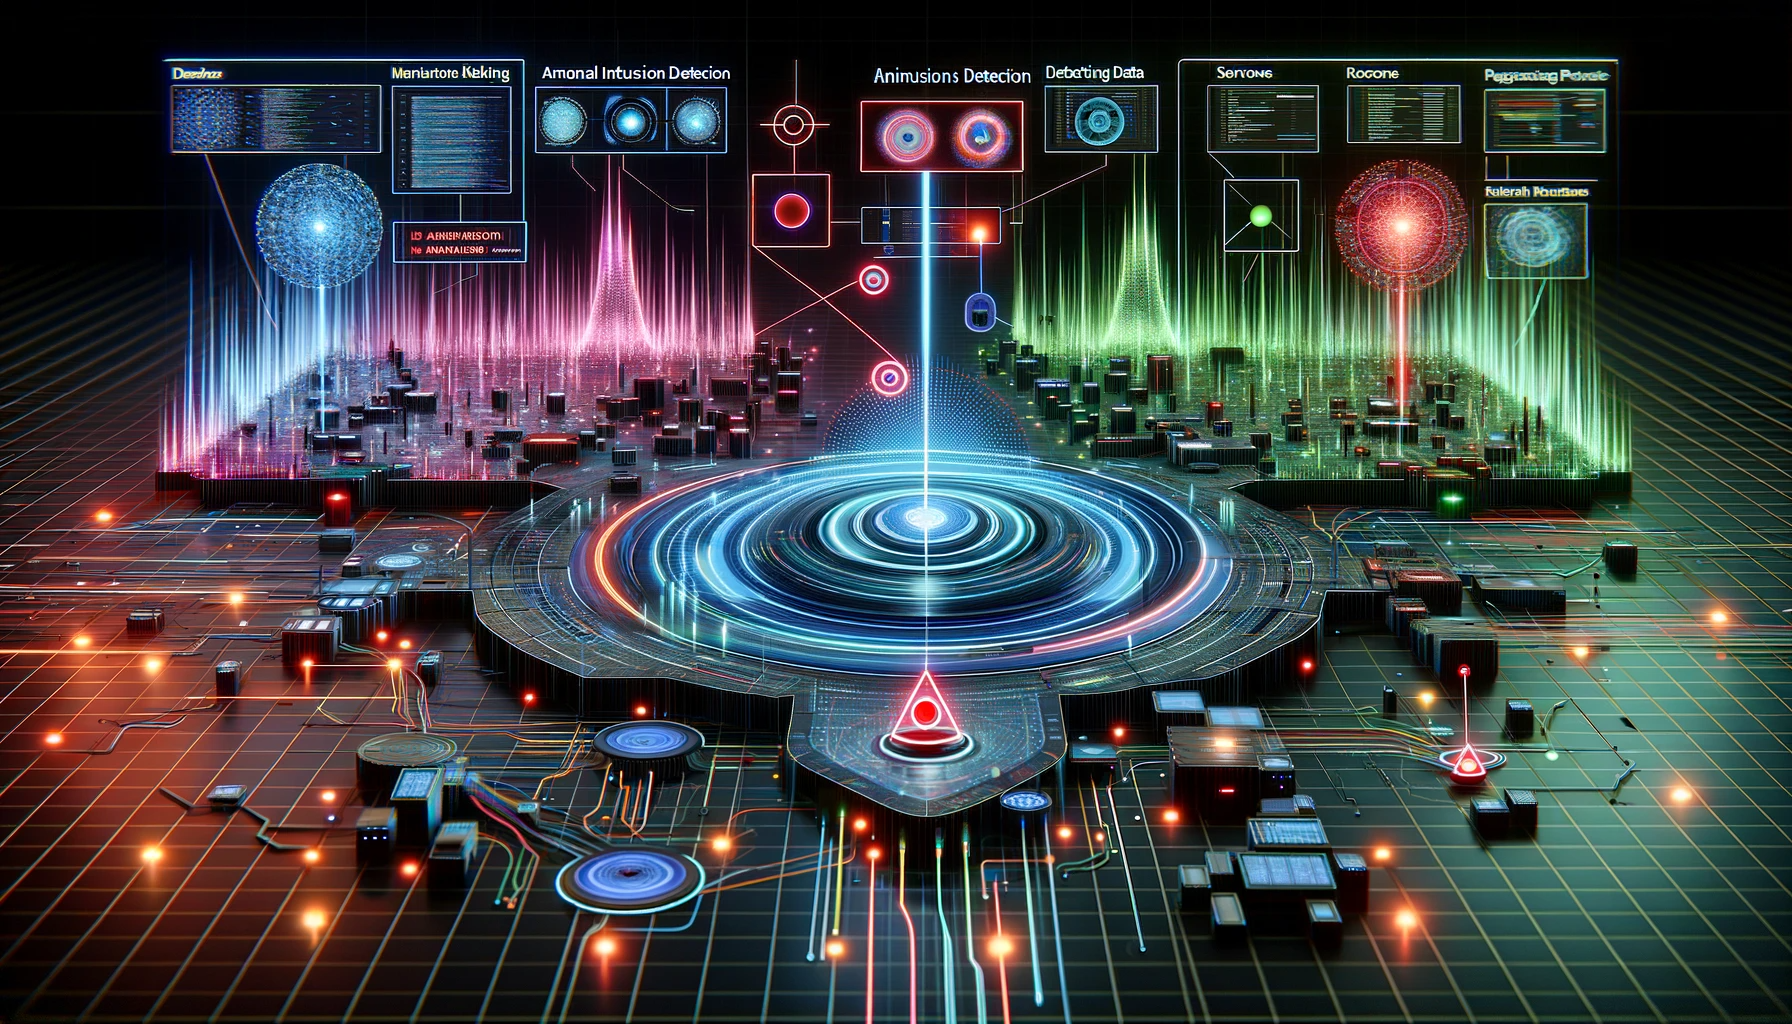**

The paper, "Anomaly Detection Using Gaussian Mixture Probability Model to Implement Intrusion Detection System," aims to enhance network intrusion detection systems (NIDS) using anomaly detection algorithms. Specifically, it proposes using multiple Gaussian Mixture Models (GMMs) to model each feature in network traffic data, followed by an asymmetric voting scheme to aggregate the detection outcomes from individual features. The methodology is tested on the NSL-KDD dataset, focusing on modeling normal behavior and detecting anomalies without requiring abnormal samples during training.

**DataSet**

**Abstract**

NSL-KDD is a data set suggested to solve some of the inherent problems of the KDD'99 data set which are mentioned in [1]. Although, this new version of the KDD data set still suffers from some of the problems discussed by McHugh [2] and may not be a perfect representative of existing real networks, because of the lack of public data sets for network-based IDSs, we believe it still can be applied as an effective benchmark data set to help researchers compare different intrusion detection methods. Furthermore, the number of records in the NSL-KDD train and test sets are reasonable. This advantage makes it affordable to run the experiments on the complete set without the need to randomly select a small portion. Consequently, evaluation results of different research work will be consistent and comparable.


**Features description**


- Duration: Duration of connection (in seconds)
- Protocol_type: Type of protocol
- Service: Network type
- Flag: Flag status
- Src_bytes: Number of bytes transferred from source to destination
- Dst_bytes: Number of bytes transferred from destination to source
- Land: If connection is to the same host, land=1; else, land=0
- Wrong_fragment: Number of wrong fragments
- Urgent: Number of urgent packets
- Hot: Number of “hot” indicators
- Num_failed_logins: Number of failed logins
- Logged_in: If logged in, logged_in=1; else, logged_in=0
- Num_compromised: Number of compromised conditions
- Root_shell: If root shell is obtained, root_shell=1; else, root_shell=0
- Su_attempted: If “su root” accesses, su_attempted=1; else, su_attempted=0
- Num_root: Number of accessed roots
- Num_file_creations: Number of file creations
- Num_shells: Number of shell prompts
- Num_access_files: Number of operations on access files
- Num_outbound_cmds: Number of outbound commands
- Is_host_login: If login is hot, is_host_login=1; else, is_host_login=0
- Is_guest_login: If login is guest, is_guest_login=1; else, is_guest_login=0
- Count: Number of connections to the same host in the last 2 seconds
- Srv_count: Number of connections to the same service in the last 2 seconds
- Serror_rate: Percentage of connection with syn error
- Srv_serror_rate: Percentage of connection with syn error
- Rerror_rate: Percentage of connection with rej error
- Srv_rerror_rate: Percentage of connection with rej error
- Same_srv_rate: Percentage of connection of the same service
- Diff_srv_rate: Percentage of connection of different service
- Srv_diff_host_rate: Percentage of connection of different hosts
- Dst_host_count: Number of connections of the same destination host
- Dst_host_srv_count: Number of connections of the same destination host and service
- Dst_host_same_srv_rate: Percentage of connections having the same destination host and service
- Dst_host_diff_srv_rate: Percentage of connections having different service on the current host
- Dst_host_same_src_port_rate: Percentage of connections of the current host having the same src port
- Dst_host_srv_diff_host_rate: Percentage of connection of the same service and different hosts
- Dst_host_serror_rate: Percentage of connections of the current host having S0 error
- Dst_host_srv_serror_rate: Percentage of connections of the current host of a service having S0 error
- Dst_host_rerror_rate: Percentage of connections of the current host that have rst error
- Dst_host_srv_rerror_rate: Percentage of connections of the current host of a service that have rst error
- Attack: Type of attack

# **Libraries** **Importation**

In [ ]:
# module imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
import sklearn
from sklearn.preprocessing import normalize
import warnings
from sklearn.decomposition import PCA
import scipy.stats
from scipy.stats import norm
from tqdm import tqdm
from sklearn.svm import SVC

# model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture

# processing imports
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import SelectFromModel, VarianceThreshold, SelectKBest, chi2
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

warnings.filterwarnings('ignore')




```

```

# **Reading and Understanding the Data**

In [ ]:
test = pd.read_csv("KDDTest+.txt")
train = pd.read_csv("KDDTrain+.txt")

In [ ]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

test.columns = columns
train.columns = columns

train.head()

duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.00   
1               0       0    0  ...                    0.10   
2               0       0    0  ...                    1.00   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.07   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.60                         0.88   
1                    0.05                         0.00   
2                    0.00                         0.03   
3                    0.00                         0.00   
4                    0.07                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  1.00   
2                         0.04                  0.03   
3                         0.00                  0.00   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                   0.0                      0.00   
1                      1.00                   0.0                      0.00   
2                      0.01                   0.0                      0.01   
3                      0.00                   0.0                      0.00   
4                      0.00                   1.0                      1.00   

    attack  level  
0   normal     15  
1  neptune     19  
2   normal     21  
3   normal     21  
4  neptune     21  

[5 rows x 43 columns]

In this code snippet, we added descriptive column labels to both the 'test' and 'train' datasets, enriching the readability and interpretability of the dataset.

In [ ]:
train.shape

(125972, 43)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

A comprehensive dataset with 125,972 entries and 43 columns, featuring a mix of numerical and categorical data capturing diverse network connection attributes. No missing values are present

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

the same for test set but with 22543 entries

In [ ]:
train.describe()

duration     src_bytes     dst_bytes           land  \
count  125972.000000  1.259720e+05  1.259720e+05  125972.000000   
mean      287.146929  4.556710e+04  1.977927e+04       0.000198   
std      2604.525522  5.870354e+06  4.021285e+06       0.014086   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  0.000000e+00  0.000000e+00       0.000000   
50%         0.000000  4.400000e+01  0.000000e+00       0.000000   
75%         0.000000  2.760000e+02  5.160000e+02       0.000000   
max     42908.000000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125972.000000  125972.000000  125972.000000      125972.000000   
mean         0.022688       0.000111       0.204411           0.001222   
std          0.253531       0.014366       2.149977           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000      77.000000           5.000000   

           logged_in  num_compromised  ...  dst_host_srv_count  \
count  125972.000000    125972.000000  ...       125972.000000   
mean        0.395739         0.279253  ...          115.653725   
std         0.489011        23.942137  ...          110.702886   
min         0.000000         0.000000  ...            0.000000   
25%         0.000000         0.000000  ...           10.000000   
50%         0.000000         0.000000  ...           63.000000   
75%         1.000000         0.000000  ...          255.000000   
max         1.000000      7479.000000  ...          255.000000   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count           125972.000000           125972.000000   
mean                 0.521244                0.082952   
std                  0.448950                0.188922   
min                  0.000000                0.000000   
25%                  0.050000                0.000000   
50%                  0.510000                0.020000   
75%                  1.000000                0.070000   
max                  1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                125972.000000                125972.000000   
mean                      0.148379                     0.032543   
std                       0.308998                     0.112564   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.060000                     0.020000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count         125972.000000             125972.000000         125972.000000   
mean               0.284455                  0.278487              0.118832   
std                0.444785                  0.445670              0.306559   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                1.000000                  1.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate          level  
count             125972.000000  125972.000000  
mean                   0.120241      19.504056  
std                    0.319460       2.291512  
min                    0.000000       0.000000  
25%                    0.000000      18.000000  
50%                   

The train.describe() output provides statistical summaries for 39 numerical columns in the 'train' dataset. Key insights include varying scales and ranges, with notable differences in means and standard deviations.
Further exploration and understanding of these statistics are essential for feature selection, scaling, and identifying potential outliers.

In [ ]:
train.describe(include='object')

protocol_type service    flag  attack
count         125972  125972  125972  125972
unique             3      70      11      23
top              tcp    http      SF  normal
freq          102688   40338   74944   67342

For instance, 'tcp' is the most frequent protocol type, 'http' is the most common service, 'SF' is the predominant flag, and 'normal' is the most prevalent type of attack.

In [ ]:
test.describe(include='object')

protocol_type service   flag  attack
count          22543   22543  22543   22543
unique             3      64     11      38
top              tcp    http     SF  normal
freq           18879    7853  14875    9711

Missing Data

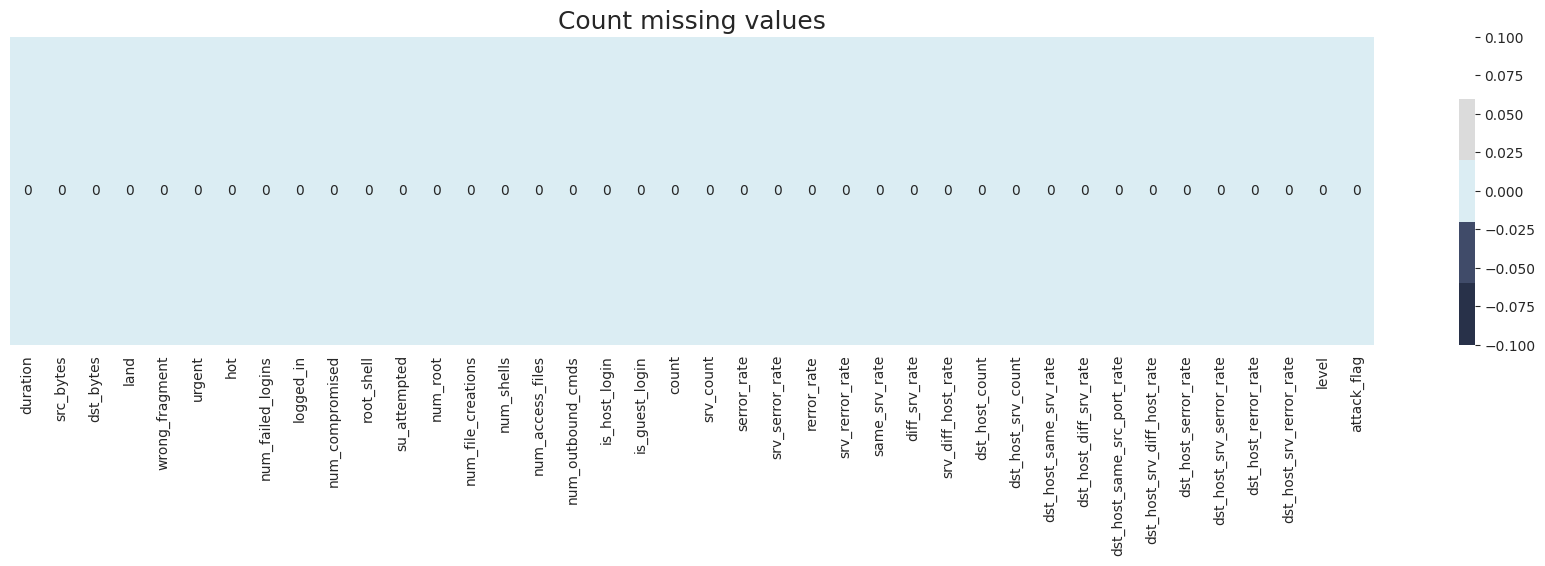

In [ ]:
# Missing values
plt.figure(figsize=(22,4))
sns.heatmap((train.isna().sum()).to_frame(name='').T,cmap=sns.color_palette(["#283149", "#404B69", "#DBEDF3", "#DBDBDB", "#FFFFFF"]), annot=True,
             fmt='0.0f').set_title('Count missing values', fontsize=18)
plt.show()

In [ ]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

The dataset has no missing values across all columns.

Duplicated Data

In [ ]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [ ]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


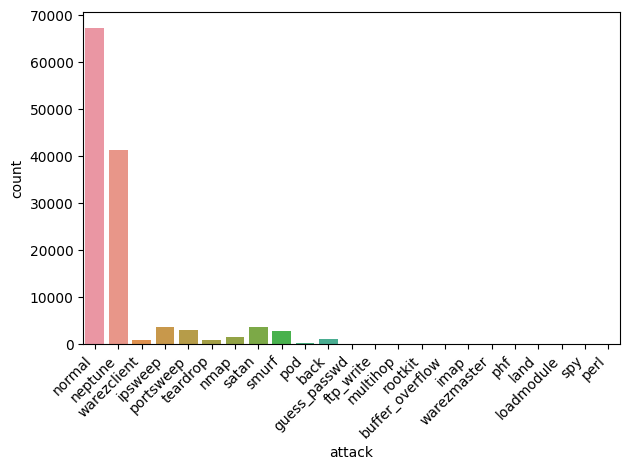

In [ ]:
sns.countplot(x=train['attack'])

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

**Numerical** **features**

In [ ]:
numerical_features = [col for col in train.columns if train[col].dtype in ['int64', 'float64']]
numerical_features

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'level']

In [ ]:
# map normal to 0, all attacks to 1
is_attack = train.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test.attack.map(lambda a: 0 if a == 'normal' else 1)

#data_with_attack = df.join(is_attack, rsuffix='_flag')
train['attack_flag'] = is_attack
test['attack_flag'] = test_attack

test.drop(['attack'], axis=1, inplace=True)
train.drop(['attack'], axis=1, inplace=True)

# view the result
train.head()

duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.00   
1               0       0    0  ...                    0.10   
2               0       0    0  ...                    1.00   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.07   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.60                         0.88   
1                    0.05                         0.00   
2                    0.00                         0.03   
3                    0.00                         0.00   
4                    0.07                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  1.00   
2                         0.04                  0.03   
3                         0.00                  0.00   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                   0.0                      0.00   
1                      1.00                   0.0                      0.00   
2                      0.01                   0.0                      0.01   
3                      0.00                   0.0                      0.00   
4                      0.00                   1.0                      1.00   

   level  attack_flag  
0     15            0  
1     19            1  
2     21            0  
3     21            0  
4     21            1  

[5 rows x 43 columns]



*   Our Target is the "attack"
*   We introduced a binary flag, 'attack_flag', in our dataset by mapping normal connections to 0 and labeling all attacks as 1.



 now we will create a grid of histograms to visualize the frequency distribution of numerical features in a subsampled portion (10%) of the training data. The histograms provide insights into the distribution patterns and potential outliers in the selected numerical features.

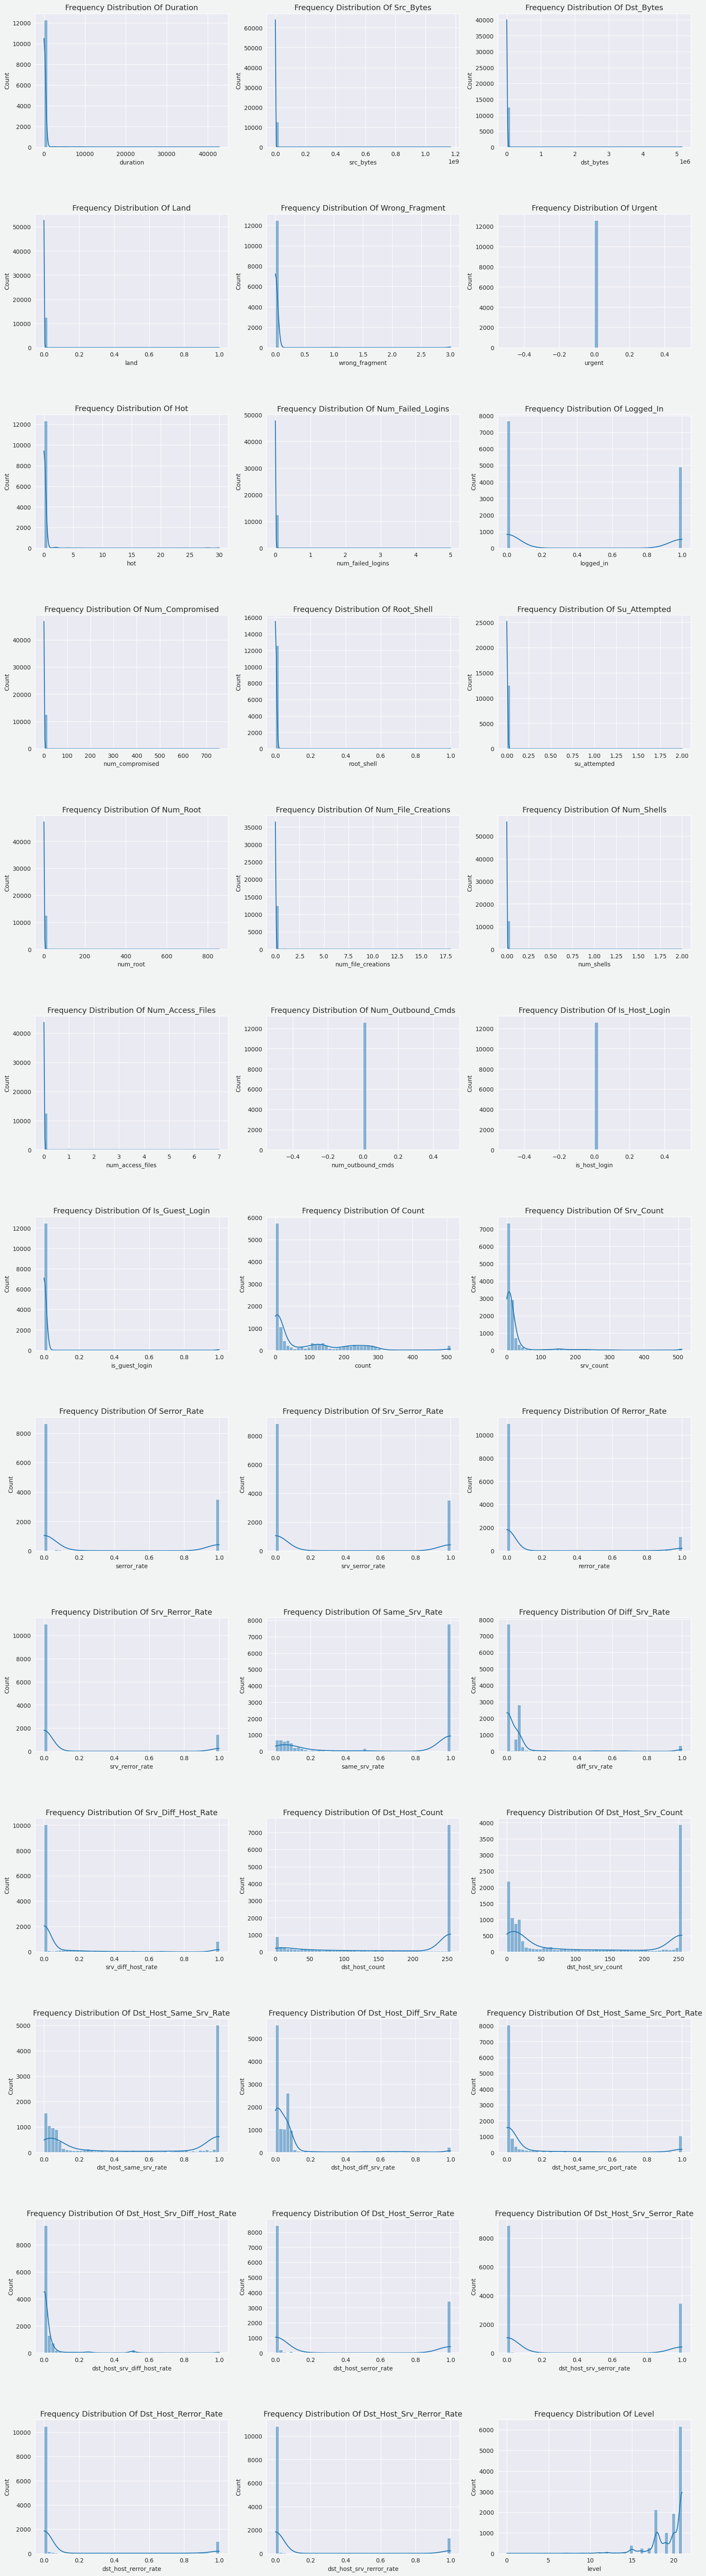

In [ ]:
subsampled_data = train[numerical_features].sample(frac=0.1, random_state=42)

# Calculate the number of rows and columns for subplots
num_rows = (len(numerical_features) + 2) // 3  # Adjust the number of columns as needed
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6), facecolor='#F2F4F4')
fig.subplots_adjust(wspace=0.2, hspace=0.5)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    h = sns.histplot(x=feature, kde=True, data=subsampled_data, bins=50, ax=axes[i])
    h.set_title(('Frequency Distribution of ' + feature).title(), fontsize=13)

# Remove any empty subplots if the number of features is not a multiple of 3
if len(numerical_features) % 3 != 0:
    for i in range(len(numerical_features), num_rows * num_cols):
        fig.delaxes(axes[i])

plt.show()

**Categorical** **features**

In [ ]:
categorical_features = [col for col in train.columns if train[col].dtype == "object" and col != 'xAttack']
print(categorical_features)

['protocol_type', 'service', 'flag']


Our data contains only 3 categorical features

In [ ]:
cat = train[categorical_features]
cat.head()

protocol_type  service flag
0           udp    other   SF
1           tcp  private   S0
2           tcp     http   SF
3           tcp     http   SF
4           tcp  private  REJ

We can then use count plots to understand the distribution of categorical data.



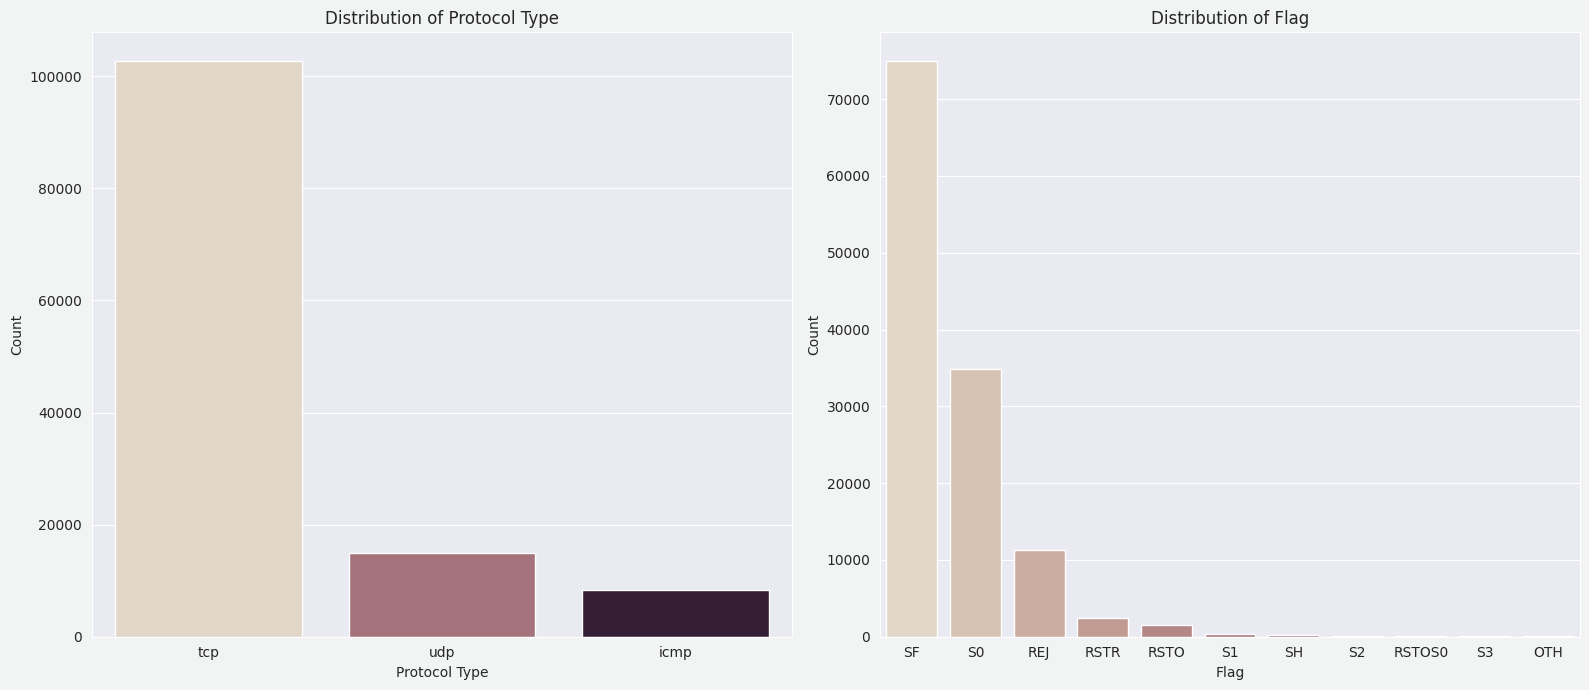

In [ ]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 7), facecolor='#F2F4F4')

# Distribution of 'protocol_type'
sns.countplot(x='protocol_type', data=train, order=train['protocol_type'].value_counts().index, ax=axes[0], palette='ch:.25')
axes[0].set_title('Distribution of Protocol Type', fontsize=12)
axes[0].set_xlabel('Protocol Type')
axes[0].set_ylabel('Count')

# Distribution of 'flag'
sns.countplot(x='flag', data=train, order=train['flag'].value_counts().index, ax=axes[1], palette='ch:.25')
axes[1].set_title('Distribution of Flag', fontsize=12)
axes[1].set_xlabel('Flag')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

plt.show()

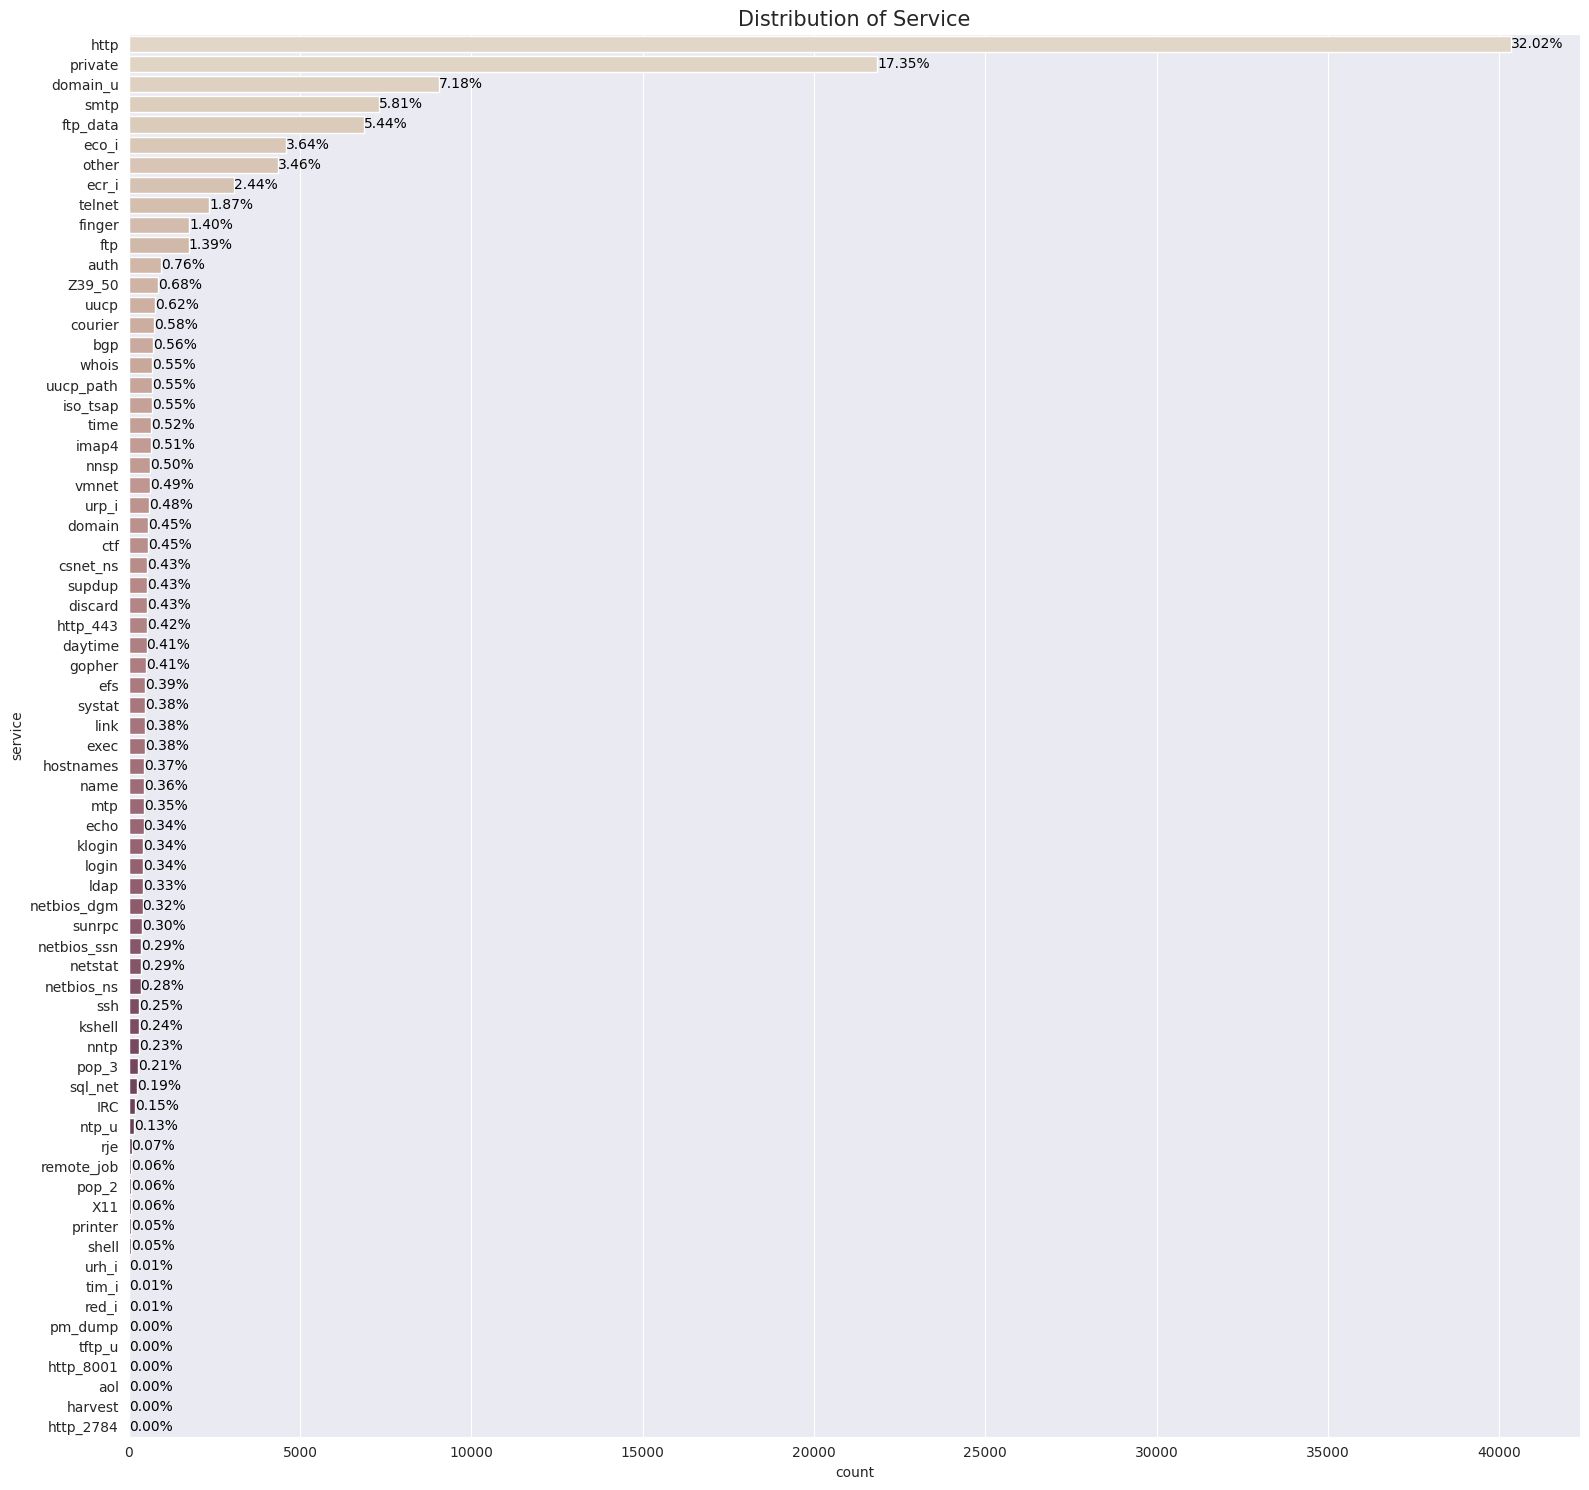

In [ ]:
plt.figure(figsize=(16, 15))
sns.set_style('darkgrid')

# Distribution of 'service'
ax = sns.countplot(y='service', data=train, order=train['service'].value_counts().index, palette='ch:.25')

# Add percentage labels
total = len(train['service'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='left', va='center', fontsize=10, color='black')

# Set title and adjust layout
plt.title('Distribution of Service', fontsize=15)
plt.tight_layout()

plt.show()

# **Data** **Preprocessing**



*   We should drop the "service" column because securing services, networks, and devices is becoming more complex with the growing number of Internet of Things (IoT) devices.**(for train and test sets )**

*   We should drop the "flag" column and keep only "tcp" in the "protocol_type" because focusing on TCP traces is more relevant and abundant for our experiments, providing valuable insights.**(for train and test sets )**



In [ ]:
train.drop(['service'], axis=1, inplace=True)
train.drop(['flag'], axis=1, inplace=True)

In [ ]:
test.drop(['service'], axis=1, inplace=True)
test.drop(['flag'], axis=1, inplace=True)

In [ ]:
train.drop(train[(train['protocol_type'] == 'udp') | (train['protocol_type'] == 'icmp')].index, inplace=True)


In [ ]:
test.drop(test[(test['protocol_type'] == 'udp') | (test['protocol_type'] == 'icmp')].index, inplace=True)


In [ ]:
train.shape

(102688, 41)

In [ ]:
test.shape

(18879, 41)

In [ ]:
train.drop(['protocol_type'], axis=1, inplace=True)
test.drop(['protocol_type'], axis=1, inplace=True)

In [ ]:
missing_val_count_by_column = (train.isnull().sum())
columns_with_missing_values =  [col for col in train.columns
                     if train[col].isnull().any()]
columns_with_missing_values

[]

Features to drop

**Correlation Heatmap**

Correlation is a univariate analysis technique. It detects linear relationships between two variables. Think of correlation as a measure of proportionality, which simply measures how the increase or decrease of a variable affects the other variable.

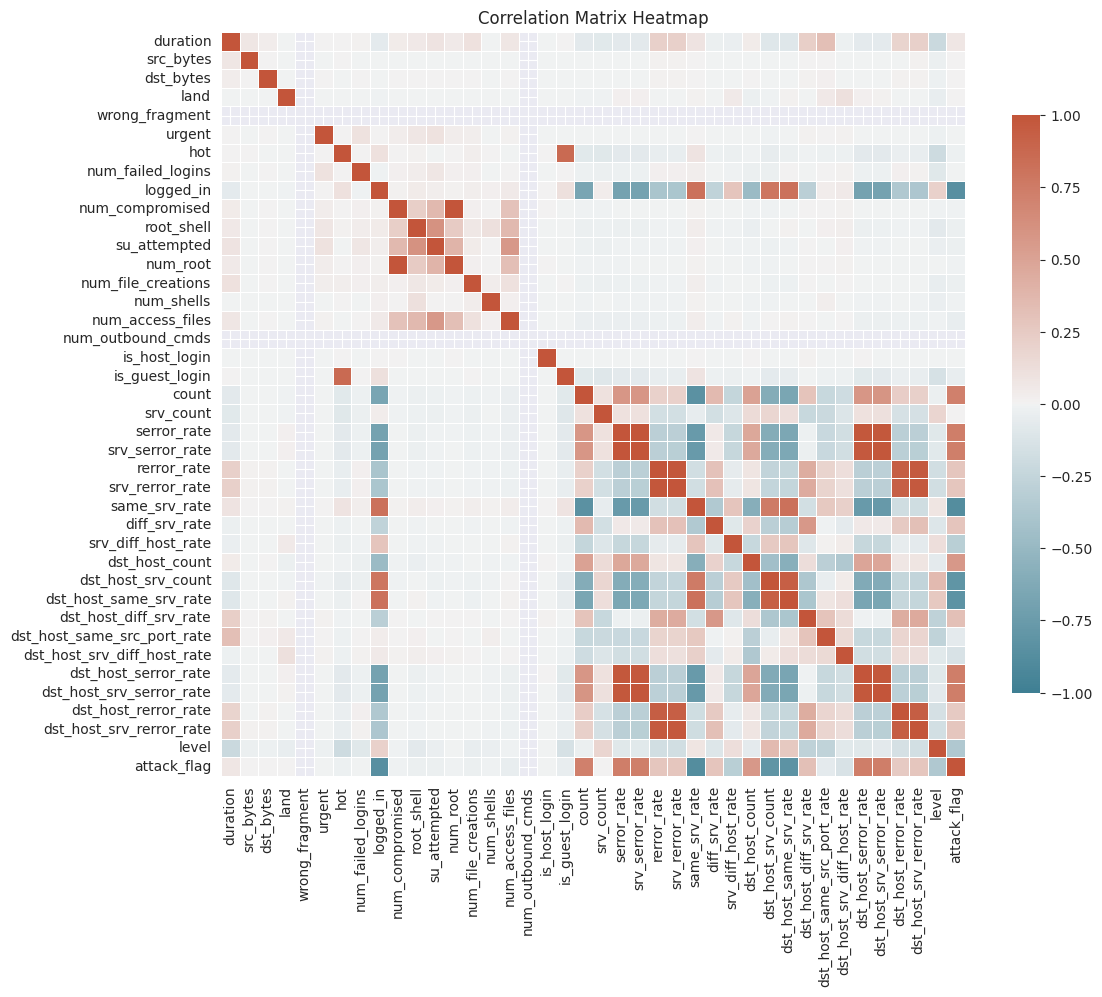

In [ ]:
corr = train.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Create a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})

plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Correlation Analysis
correlation_matrix = train.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
columns_to_drop_correlation = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
print("Columns that can be dropped using correlation:",columns_to_drop_correlation)

Columns that can be dropped using correlation: ['num_root', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


Correlation Analysis:

Calculate the correlation matrix for our features.

Identify pairs of highly correlated features.

If two features are highly correlated, you might consider keeping only one of them.

**we just created a copy of the "Train" set named**
**D_RAW**

In [ ]:
d_raw_test=test.copy()
d_raw_train=train.copy()

In [ ]:
train_target = d_raw_train['attack_flag']
d_raw_train.drop('attack_flag',inplace=True,axis=1)

test_target = d_raw_test['attack_flag']
d_raw_test.drop('attack_flag',inplace=True,axis=1)

<Axes: xlabel='attack_flag', ylabel='count'>

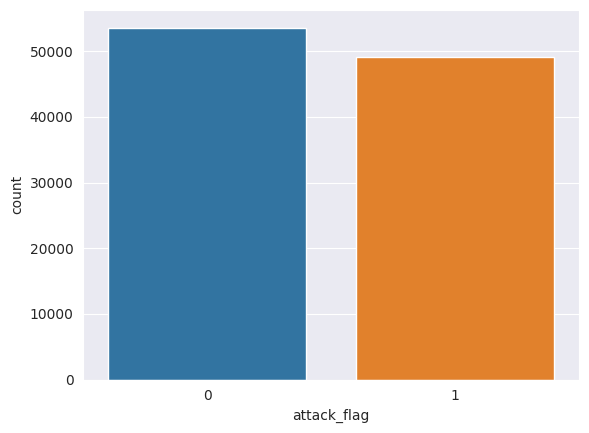

In [ ]:
sns.countplot(x=train['attack_flag'])

**Importance of features using Wrapper Method**




The Wrapper Method for feature importance involves training a predictive model and evaluating the impact of each feature on its performance.

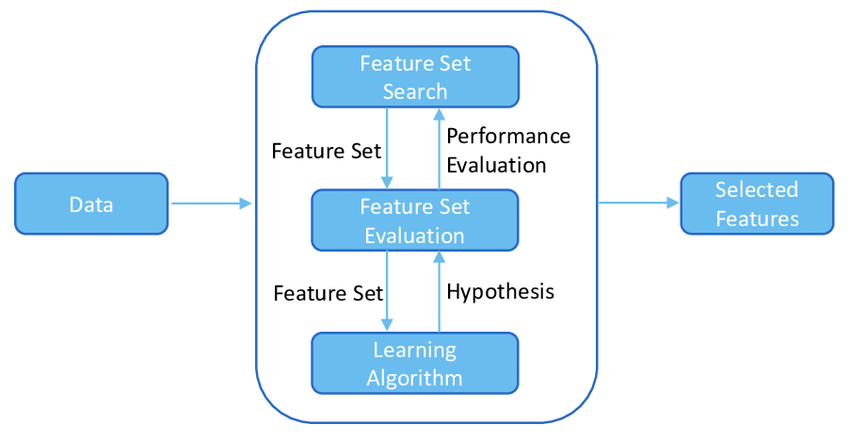

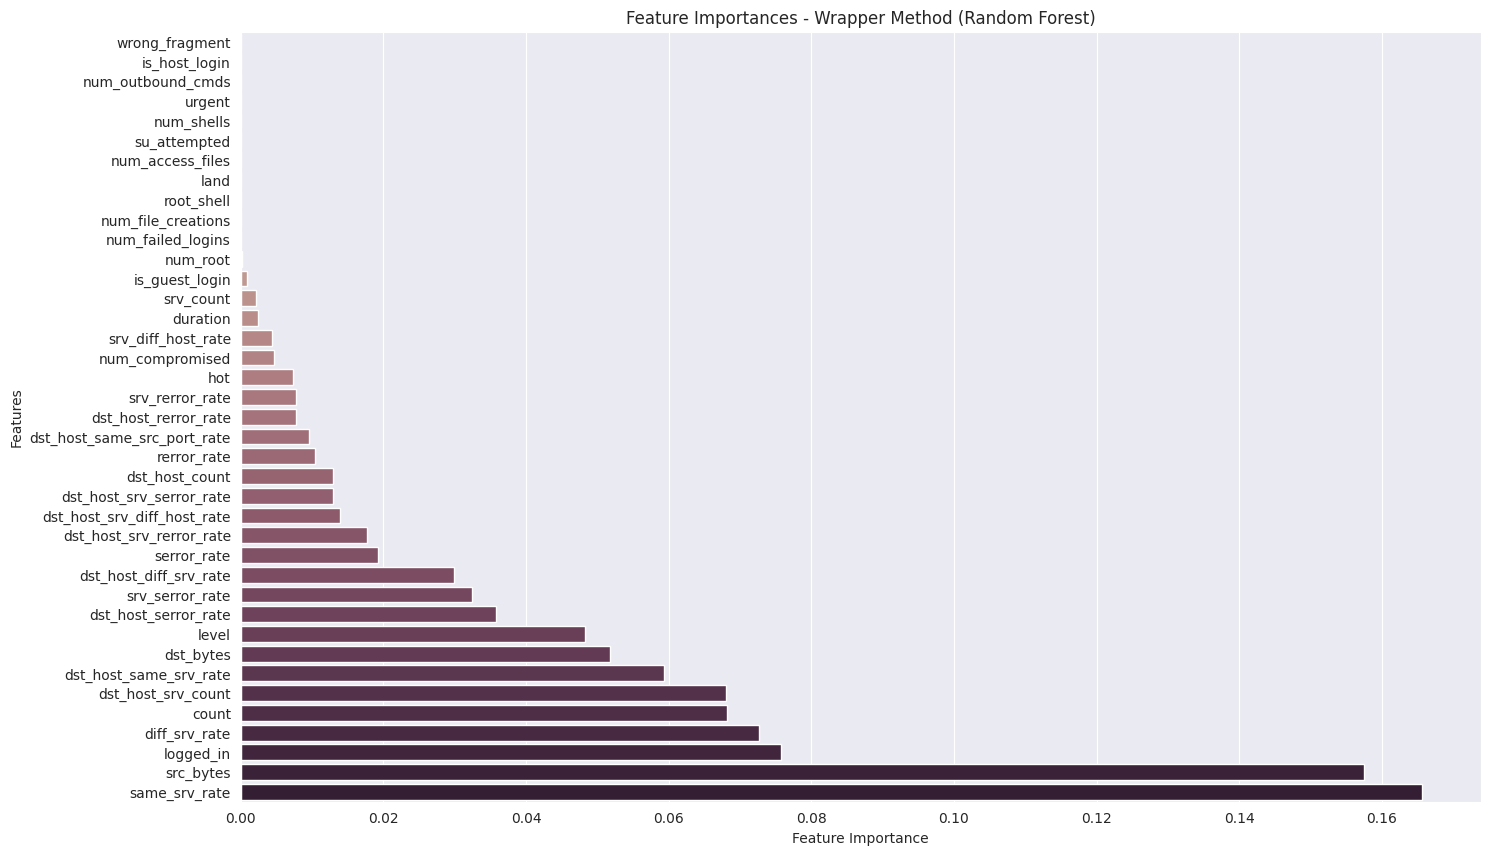

In [ ]:
# Fit the selector to the training data
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0))
selector.fit(d_raw_train, train_target)

# Get the selected features
support = selector.get_support()
features = d_raw_train.loc[:, support].columns.tolist()

# Visualize feature importances
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(d_raw_train, train_target)   #The choice of features is based on the input data d_raw_train and the corresponding target variable train_target.

feature_importances = rf_model.feature_importances_
sorted_idx = feature_importances.argsort()

# Create a bar plot
plt.figure(figsize=(16, 10))
sns.set_style('darkgrid')
sns.barplot(x=feature_importances[sorted_idx], y=d_raw_train.columns[sorted_idx], palette='ch:.25')
plt.title('Feature Importances - Wrapper Method (Random Forest)')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

This code leverages a Random Forest model to identify and visualize essential features for predicting attacks. It employs a selector on the training data, determines selected features, and creates a bar plot illustrating the importance of each feature in attack prediction.

**Columns** **dropping**

In [ ]:
columns_to_drop = ['src_bytes','dst_bytes','urgent','num_failed_logins','num_compromised','root_shell'
    ,'su_attempted','num_root','num_file_creations','num_shells','num_access_files','is_host_login','is_guest_login'
    ,'num_outbound_cmds','wrong_fragment']

In [ ]:
# Drop unwanted features
d_raw_train = d_raw_train.drop(columns_to_drop, axis=1)
d_raw_train.shape

(102688, 24)

In [ ]:
# Drop unwanted features
d_raw_test = d_raw_test.drop(columns_to_drop, axis=1)
d_raw_test.shape

(18879, 24)

**Outliers**

In [ ]:
# Vérifier et gérer les valeurs aberrantes (outliers)
# Par exemple, en utilisant la méthode des IQR (Interquartile Range)
Q1 = d_raw_train.quantile(0.25)
Q3 = d_raw_train.quantile(0.75)
IQR = Q3 - Q1
valeurs_aberrantes = ((d_raw_train < (Q1 - 1.5 * IQR)) | (d_raw_train > (Q3 + 1.5 * IQR))).sum()
print("\nNombre de valeurs aberrantes par colonne :\n", valeurs_aberrantes)


Nombre de valeurs aberrantes par colonne :
 duration                        8053
land                              25
hot                             2671
logged_in                          0
count                           1310
srv_count                       2261
serror_rate                        0
srv_serror_rate                    0
rerror_rate                    16104
srv_rerror_rate                16206
same_srv_rate                      0
diff_srv_rate                   5482
srv_diff_host_rate             19325
dst_host_count                     0
dst_host_srv_count                 0
dst_host_same_srv_rate             0
dst_host_diff_srv_rate          7098
dst_host_same_src_port_rate    18662
dst_host_srv_diff_host_rate     7261
dst_host_serror_rate               0
dst_host_srv_serror_rate           0
dst_host_rerror_rate           20723
dst_host_srv_rerror_rate       19357
level                           4757
dtype: int64


Anomaly detection algorithms are used to identify unusual

behavior or **outliers** in the network traffic in order to generate alarms.

 so we don't need to eliminate any outliers because they are necessary for a better training process

# **The eight generated datasets**

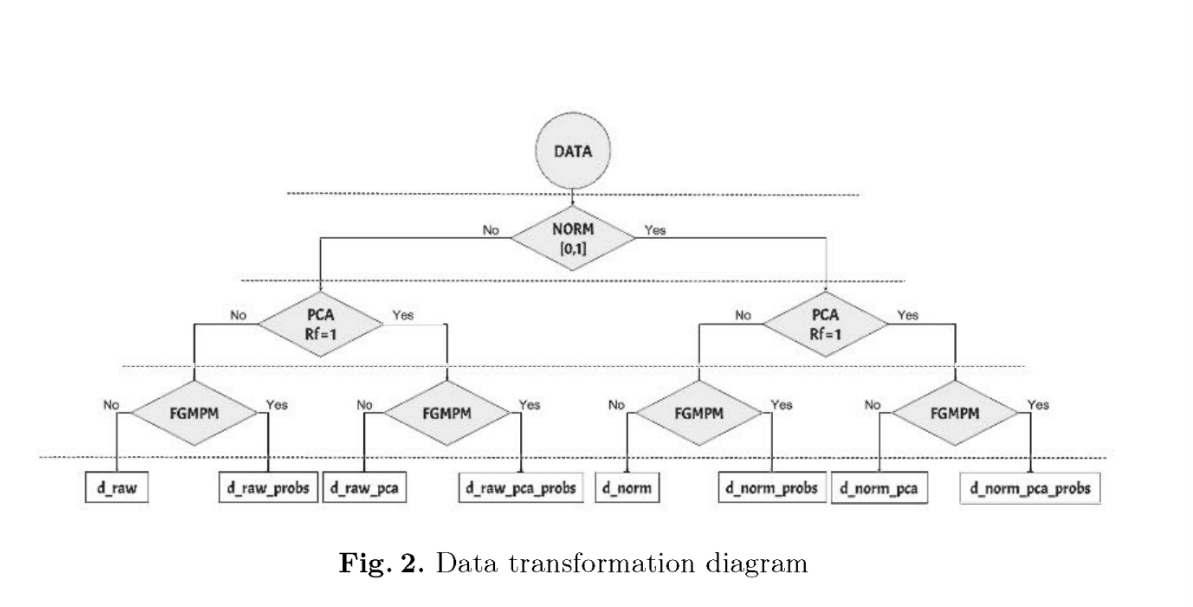

we applied  three techniques to our training and testing
dataset without changing any configuration.

**Normalization**

it calculate distances
between points using the Euclidean distance or even accelerates the convergence
of many optimization algorithms such as gradient descent. We use feature scaling
to adjust all column feature values into the range [0,1] and avoid large variations
in data.

**Principal Component** **Analysis**

 is a statistical method that transforms correlated variables into linearly uncorrelated ones called principal components. It aims to reduce data dimensionality while preserving maximum information. The focus here is on using PCA to generate uncorrelated features, simplifying analysis by treating them as nearly independent, and exploring both approaches.

**Feature Gaussian Mixture Probability Model**

A Gaussian mixture model probabilistically represents data as a mix of Gaussian distributions. Using an expectation-maximization algorithm, we identify latent components for anomaly detection. Modeling normal system behavior as a Gaussian mixture, we estimate mean and variance. By determining the highest probability latent component for each feature in a traffic vector, we calculate the occurrence probability based on a worst-case scenario.



**D_RAW**

The original NSL dataset without any transformation of the numerical
values.

In [ ]:
d_raw_train.head()

duration  land  hot  logged_in  count  srv_count  serror_rate  \
1         0     0    0          0    123          6          1.0   
2         0     0    0          1      5          5          0.2   
3         0     0    0          1     30         32          0.0   
4         0     0    0          0    121         19          0.0   
5         0     0    0          0    166          9          1.0   

   srv_serror_rate  rerror_rate  srv_rerror_rate  ...  dst_host_srv_count  \
1              1.0          0.0              0.0  ...                  26   
2              0.2          0.0              0.0  ...                 255   
3              0.0          0.0              0.0  ...                 255   
4              0.0          1.0              1.0  ...                  19   
5              1.0          0.0              0.0  ...                   9   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
1                    0.10                    0.05   
2                    1.00                    0.00   
3                    1.00                    0.00   
4                    0.07                    0.07   
5                    0.04                    0.05   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
1                         0.00                         0.00   
2                         0.03                         0.04   
3                         0.00                         0.00   
4                         0.00                         0.00   
5                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
1                  1.00                      1.00                   0.0   
2                  0.03                      0.01                   0.0   
3                  0.00                      0.00                   0.0   
4                  0.00                      0.00                   1.0   
5                  1.00                      1.00                   0.0   

   dst_host_srv_rerror_rate  level  
1                      0.00     19  
2                      0.01     21  
3                      0.00     21  
4                      1.00     21  
5                      0.00     21  

[5 rows x 24 columns]

In [ ]:
d_raw_test.head()

duration  land  hot  logged_in  count  srv_count  serror_rate  \
0         0     0    0          0    136          1          0.0   
1         2     0    0          0      1          1          0.0   
3         1     0    0          0      1          8          0.0   
4         0     0    0          1      4          4          0.0   
5         0     0    0          1      1          3          0.0   

   srv_serror_rate  rerror_rate  srv_rerror_rate  ...  dst_host_srv_count  \
0             0.00          1.0              1.0  ...                   1   
1             0.00          0.0              0.0  ...                  86   
3             0.12          1.0              0.5  ...                  86   
4             0.00          0.0              0.0  ...                 255   
5             0.00          0.0              0.0  ...                  28   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.00                    0.06   
1                    0.61                    0.04   
3                    0.31                    0.17   
4                    1.00                    0.00   
5                    0.11                    0.72   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.00                         0.00   
1                         0.61                         0.02   
3                         0.03                         0.02   
4                         0.01                         0.03   
5                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                       0.0                  1.00   
1                  0.00                       0.0                  0.00   
3                  0.00                       0.0                  0.83   
4                  0.01                       0.0                  0.00   
5                  0.00                       0.0                  0.72   

   dst_host_srv_rerror_rate  level  
0                      1.00     21  
1                      0.00     21  
3                      0.71     11  
4                      0.00     21  
5                      0.04     21  

[5 rows x 24 columns]

In [ ]:
d_raw_train['attack_flag'] = train_target
d_raw_train_normal = d_raw_train[d_raw_train['attack_flag'] == 0]
d_raw_train_normal.drop(['attack_flag'], inplace=True, axis = 1)
d_raw_train.drop(['attack_flag'], inplace=True, axis = 1)
d_raw_train_normal.head()

duration  land  hot  logged_in  count  srv_count  serror_rate  \
2          0     0    0          1      5          5          0.2   
3          0     0    0          1     30         32          0.0   
11         0     0    0          1      3          7          0.0   
15         0     0    0          1      8          9          0.0   
17         0     0    0          1      3          3          0.0   

    srv_serror_rate  rerror_rate  srv_rerror_rate  ...  dst_host_srv_count  \
2              0.20          0.0              0.0  ...                 255   
3              0.00          0.0              0.0  ...                 255   
11             0.00          0.0              0.0  ...                 219   
15             0.11          0.0              0.0  ...                 255   
17             0.00          0.0              0.0  ...                 255   

    dst_host_same_srv_rate  dst_host_diff_srv_rate  \
2                      1.0                     0.0   
3                      1.0                     0.0   
11                     1.0                     0.0   
15                     1.0                     0.0   
17                     1.0                     0.0   

    dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
2                          0.03                         0.04   
3                          0.00                         0.00   
11                         0.12                         0.03   
15                         0.01                         0.02   
17                         0.02                         0.03   

    dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
2                   0.03                      0.01                  0.00   
3                   0.00                      0.00                  0.00   
11                  0.00                      0.00                  0.00   
15                  0.00                      0.00                  0.00   
17                  0.00                      0.00                  0.02   

    dst_host_srv_rerror_rate  level  
2                       0.01     21  
3                       0.00     21  
11                      0.00     21  
15                      0.00     21  
17                      0.00     21  

[5 rows x 24 columns]

**D_RAW_Probs**

We apply the FGMPM to the original NSL dataset values and
change each feature value for the occurrence probability of each feature in the
normal model.

In [ ]:
def GMM_Row_Transform(data, values, threshold):
    probs = []
    for idx in range(len(data.columns)):
        mean = np.array(data.iloc[:,idx]).mean()
        std = np.array(data.iloc[:,idx]).std()

        z_score = (values[idx] - mean)/std
        prob = (1-norm.cdf(z_score))*100
        probs.append(prob)
    return probs

In [ ]:
def GMM_Matrix_Transform(origin_data, data, threshold):
    matrix = []
    for i in tqdm(range(len(data))):
        row = GMM_Row_Transform(origin_data, data.iloc[i,:], threshold)

        matrix.append(row)
    return matrix

Gaussian Mixture Probability Model latent components for each feature are
computed only with the information of the normal records in the training set.

In [ ]:
d_raw_probs_test = pd.DataFrame(GMM_Matrix_Transform(d_raw_train_normal, d_raw_test, 50))

100%|██████████| 18879/18879 [06:54<00:00, 45.58it/s]


In [ ]:
d_raw_probs_train = pd.DataFrame(GMM_Matrix_Transform(d_raw_train_normal, d_raw_train, 50))

100%|██████████| 102688/102688 [36:39<00:00, 46.68it/s]


In [ ]:
d_raw_probs_train_normal = pd.DataFrame(GMM_Matrix_Transform(d_raw_train_normal, d_raw_train_normal, 50))


100%|██████████| 53599/53599 [19:51<00:00, 45.00it/s]


**D_RAW_PCA**

The uncorrelated version of the original NSL dataset with the
same number of features.

In [ ]:
def PCA_transformation(data, dim = None):
    pca = PCA()
    pca.fit(data)
    cum_vars = np.cumsum(pca.explained_variance_ratio_)
    for i in range(len(cum_vars)):
        if cum_vars[i] == 0.999:
            break
    if dim:
        pca = PCA(dim)
        data = pca.fit_transform(data)
        return pd.DataFrame(data)

    pca = PCA(i)
    data = pca.fit_transform(data)
    return pd.DataFrame(data), i

In [ ]:
d_raw_pca_train, dim = PCA_transformation(d_raw_train)
d_raw_pca_test = PCA_transformation(d_raw_test, dim)

In [ ]:
d_raw_pca_train_normal, _ = PCA_transformation(d_raw_train_normal)

In [ ]:
d_raw_pca_train_normal.shape

(53599, 23)

**D_NORM**

The original NSL dataset with the normal training values normal-
ized to the range [0-1] and the remaining values normalized according to the

previous scaler.

In [ ]:
def normalizing(data):
    for idx in range(len(data.columns)):
        if data.nunique()[idx] != 2:
            data.iloc[:,idx] = normalize([np.array(data.iloc[:,idx])]).reshape(-1)
    return data

In [ ]:
d_norm_train = normalizing(d_raw_train)
d_norm_test = normalizing(d_raw_test)

In [ ]:
d_norm_train_normal = normalizing(d_raw_train_normal)

**D_NORM_PCA**

We apply the FGPM to the normalized version of the
dataset.

In [ ]:
d_norm_pca_train, dim = PCA_transformation(normalizing(d_raw_train))
d_norm_pca_test = PCA_transformation(normalizing(d_raw_test), dim)

In [ ]:
d_norm_pca_train_normal, dim = PCA_transformation(normalizing(d_raw_train_normal))

**D_RAW_PCA_PROBS**

We apply the FGMPM to the uncorrelated version of the
original dataset and obtain the occurrence probabilities for this uncorrelated
values of the features.

In [ ]:
d_raw_pca_train.shape

(102688, 23)

In [ ]:
d_raw_pca_train_t, dim = PCA_transformation(d_raw_train)
d_raw_pca_probs_train = pd.DataFrame(GMM_Matrix_Transform(d_raw_pca_train_normal, d_raw_pca_train_t, 50))

d_raw_pca_test_ts = PCA_transformation(d_raw_test, dim )
d_raw_pca_probs_test = pd.DataFrame(GMM_Matrix_Transform(d_raw_pca_train_normal, d_raw_pca_test_ts, 50))

100%|██████████| 18879/18879 [05:43<00:00, 54.90it/s]


In [ ]:
d_raw_pca_train_normal_nr, dim = PCA_transformation(d_raw_train_normal)
d_raw_pca_probs_train_normal = pd.DataFrame(GMM_Matrix_Transform(d_raw_pca_train_normal_nr, d_raw_pca_train_normal_nr, 50))

100%|██████████| 53599/53599 [17:48<00:00, 50.15it/s]


**D_Norm_PROBS**

We apply the FGPM to the normalized version of the
dataset.


In [ ]:
d_norm_train_p = normalizing(d_raw_train)
d_norm_probs_train = pd.DataFrame(GMM_Matrix_Transform(d_norm_train_normal, d_norm_train_p, 50))


100%|██████████| 102688/102688 [33:41<00:00, 50.79it/s]


NameError: ignored

In [ ]:
d_norm_test_ps = normalizing(d_raw_test)
d_norm_probs_test = pd.DataFrame(GMM_Matrix_Transform(d_norm_train_normal, d_norm_test_ps, 50))

100%|██████████| 18879/18879 [06:21<00:00, 49.46it/s]


In [ ]:
d_norm_probs__normal = normalizing(d_raw_train_normal)
d_norm_probs_train_normal = pd.DataFrame(GMM_Matrix_Transform(d_norm_probs__normal, d_norm_probs__normal, 50))

100%|██████████| 53599/53599 [19:49<00:00, 45.07it/s]


**D_Norm_PCA_PROBS**

The occurrence probabilities of the uncorrelated fea-
tures of the normalized dataset.

In [ ]:
d_norm_pca_train_1 = normalizing(d_raw_train)
d_norm_pca_train_2, dim = PCA_transformation(d_norm_pca_train_1)
d_norm_pca_probs_train = pd.DataFrame(GMM_Matrix_Transform(d_norm_pca_train_normal, d_norm_pca_train_2, 50))

d_norm_pca_test_1 = normalizing(d_raw_test)
d_norm_pca_test_2, dim = PCA_transformation(d_norm_pca_test_1)
d_norm_pca_probs_test = pd.DataFrame(GMM_Matrix_Transform(d_norm_pca_train_normal, d_norm_pca_test_2, 50))

100%|██████████| 18879/18879 [06:00<00:00, 52.35it/s]


In [ ]:
d_norm_pca_1_train_normal = normalizing(d_raw_train_normal)
d_norm_pca_2_train_normal, dim = PCA_transformation(d_norm_pca_1_train_normal)
d_norm_pca_probs_train_normal = pd.DataFrame(GMM_Matrix_Transform(d_norm_pca_2_train_normal, d_norm_pca_2_train_normal, 50))

100%|██████████| 53599/53599 [24:08<00:00, 37.00it/s]


# **Modeling**

In this phase, we will build models and apply them later on each of each of generated datasets.

**VOTING**

Our proposed voting scheme method for anomaly detection that can only be applied to the probability datasets.

In [ ]:
def GMM_vote(data, values, threshold):
    no = 0
    for idx in range(len(data.columns)):
        mean = np.array(data.iloc[:,idx]).mean()
        std = np.array(data.iloc[:,idx]).std()

        z_score = (values[idx] - mean)/std
        prob = (1-norm.cdf(z_score))*100
        if prob <= threshold:
            no += 1
    return no

In [ ]:
def voting(data_train, data_test, min_abnormal_features = 10, threshold = 50):
    preds = []
    for idx in tqdm(range(len(data_test))):
        values = list(data_test.iloc[idx,:])
        no = GMM_vote(data_train, values, threshold)
        if no > min_abnormal_features:
            preds.append(1)
        else:
            preds.append(0)
    return preds

**D_RAW_PROBS**

In [ ]:
voting_d_raw_probs_preds = voting(d_raw_probs_train_normal, d_raw_probs_test, min_abnormal_features = 10, threshold = 50)

100%|██████████| 18879/18879 [05:54<00:00, 53.19it/s]


**D_RAW_PCA_PROBS**

In [ ]:
voting_d_raw_pca_probs_preds = voting(d_raw_pca_probs_train_normal, d_raw_pca_probs_test, min_abnormal_features = 10, threshold = 50)


100%|██████████| 18879/18879 [05:37<00:00, 55.97it/s]


***D_NORM_PROBS***

In [ ]:
voting_d_norm_probs_preds = voting(d_norm_probs_train_normal, d_norm_probs_test, min_abnormal_features = 10, threshold = 50)


100%|██████████| 18879/18879 [07:47<00:00, 40.42it/s]


**D_NORM_PCA_PROBS**

In [ ]:
voting_d_norm_pca_probs_preds = voting(d_norm_pca_probs_train_normal, d_norm_pca_probs_test, min_abnormal_features = 10, threshold = 50)


100%|██████████| 18879/18879 [07:43<00:00, 40.74it/s]


**K-Means (euclidean distance)**

The well known K-Means algorithm using the anomaly detection approach with the squared euclidean distances.

In [ ]:
def K_means_Distance(test_idx, test_data, model):
    c1 = np.array(test_data.iloc[test_idx,:])
    c2 = model.cluster_centers_[0]
    temp = c1 - c2
    euclid_dist = np.sqrt(np.dot(temp.T, temp))
    euclid_dist
    return euclid_dist

In [ ]:
def kmd_model(test_data, train_data, model, threshold_dis):
    kmd_d_raw_preds  = []
    for idx in tqdm(range(len(test_data))):
        dis = K_means_Distance(idx, test_data, model)
        if dis > threshold_dis:
            kmd_d_raw_preds.append(1)
        else:
            kmd_d_raw_preds.append(0)
    return kmd_d_raw_preds

**D_RAW**

In [ ]:
kmeans = KMeans(n_clusters=1, random_state=0, n_init="auto").fit(d_raw_train_normal)
kmd_d_raw_preds = kmd_model( d_raw_test, d_raw_train_normal, kmeans, 0.8)


100%|██████████| 18879/18879 [00:03<00:00, 5312.34it/s]


**D_RAW_PROBS**

In [ ]:
kmeans = KMeans(n_clusters=1, random_state=0, n_init="auto").fit(d_raw_probs_train_normal)
kmd_d_raw_probs_preds = kmd_model( d_raw_probs_test, d_raw_probs_train_normal, kmeans, 0.8)


100%|██████████| 18879/18879 [00:01<00:00, 10765.93it/s]


**D_RAW_PCA**

In [ ]:
kmeans = KMeans(n_clusters=1, random_state=0, n_init="auto").fit(d_raw_pca_train_normal)
kmd_d_raw_pca_preds = kmd_model( d_raw_pca_test, d_raw_pca_train_normal, kmeans, 0.8)


100%|██████████| 18879/18879 [00:01<00:00, 11907.65it/s]


**D_RAW_PCA_PROBS**

In [ ]:
kmeans = KMeans(n_clusters=1, random_state=0, n_init="auto").fit(d_raw_pca_probs_train_normal)
kmd_d_raw_pca_probs_preds = kmd_model( d_raw_pca_probs_test, d_raw_pca_probs_train_normal, kmeans, 0.8)


100%|██████████| 18879/18879 [00:02<00:00, 7956.84it/s]


**D_NORM**

In [ ]:
kmeans = KMeans(n_clusters=1, random_state=0, n_init="auto").fit(d_norm_train_normal)
kmd_d_norm_preds = kmd_model( d_norm_test, d_norm_train_normal, kmeans, 0.8)


100%|██████████| 18879/18879 [00:02<00:00, 6729.90it/s]


**D_NORM_PROBS**

In [ ]:
kmeans = KMeans(n_clusters=1, random_state=0, n_init="auto").fit(d_norm_probs_train_normal)
kmd_d_norm_probs_preds = kmd_model( d_norm_probs_test, d_norm_probs_train_normal, kmeans, 0.8)


100%|██████████| 18879/18879 [00:01<00:00, 11466.63it/s]


**D_NORM_PCA**

In [ ]:
kmeans = KMeans(n_clusters=1, random_state=0, n_init="auto").fit(d_norm_pca_train_normal)
kmd_d_norm_pca_preds = kmd_model( d_norm_pca_test, d_norm_pca_train_normal, kmeans, 0.8)


100%|██████████| 18879/18879 [00:02<00:00, 7622.55it/s]


***D_NORM_PCA_PROBS***

In [ ]:
kmeans = KMeans(n_clusters=1, random_state=0, n_init="auto").fit(d_norm_pca_probs_train_normal)
kmd_d_norm_pca_probs_preds = kmd_model( d_norm_pca_probs_test, d_norm_pca_probs_train_normal, kmeans, 0.8)


100%|██████████| 18879/18879 [00:01<00:00, 11752.91it/s]


**Support Vector** **Machine**



We will use this algorithm with the objective of obtaining a membership decision boundary for only one class of data.

In [ ]:
def SVM_model(train_data, test_data):
    model = SVC()
    model.fit(train_data, train_target)
    preds = model.predict(test_data)
    return preds

 **D_RAW**

In [ ]:
svm_d_raw_preds = SVM_model(d_raw_train, d_raw_test)


**D_RAW_PROBS**

In [ ]:
svm_d_raw_probs_preds = SVM_model(d_raw_probs_train, d_raw_probs_test)


**D_RAW_PCA**

In [ ]:
svm_d_raw_pca_preds = SVM_model(d_raw_pca_train, d_raw_pca_test)


***D_RAW_PCA_PROBS***

In [ ]:
svm_d_raw_pca_probs_preds = SVM_model(d_raw_pca_probs_train, d_raw_pca_probs_test)


**D_NORM**

In [ ]:
svm_d_norm_preds = SVM_model(d_norm_train, d_norm_test)


**D_NORM_PROBS**

In [ ]:
svm_d_norm_probs_preds = SVM_model(d_norm_probs_train, d_norm_probs_test)


**D_NORM_PCA**

In [ ]:
svm_d_norm_pca_preds = SVM_model(d_norm_pca_train, d_norm_pca_test)


**D_NORM_PCA_PROBS**

In [ ]:
svm_d_norm_pca_probs_preds = SVM_model(d_norm_pca_probs_train, d_norm_pca_probs_test)



**K-Means (standard)**

We will be applying K-Means algorithm in its standard clustering approach on each of the generated datasets.

In [ ]:
def kmean_C_model(train_data, test_data):
    kmeans = KMeans(n_clusters=2, n_init="auto").fit(train_data)
    preds = kmeans.predict(test_data)
    return preds

**D_RAW**

In [ ]:
kmean_d_raw_preds = kmean_C_model(d_raw_train, d_raw_test)


**D_RAW_PROBS**

In [ ]:
kmean_d_raw_probs_preds = kmean_C_model(d_raw_probs_train, d_raw_probs_test)


**D_RAW_PCA**

In [ ]:
kmean_d_raw_pca_preds = kmean_C_model(d_raw_pca_train, d_raw_pca_test)


**D_RAW_PCA_PROBS**

In [ ]:
kmean_d_raw_pca_probs_preds = kmean_C_model(d_raw_pca_probs_train, d_raw_pca_probs_test)


**D_NORM**

In [ ]:
kmean_d_norm_preds = kmean_C_model(d_norm_train, d_norm_test)


**D_NORM_PROBS**

In [ ]:
kmean_d_norm_probs_preds = kmean_C_model(d_norm_probs_train, d_norm_probs_test)


**D_NORM_PCA**

In [ ]:
kmean_d_norm_pca_preds = kmean_C_model(d_norm_pca_train, d_norm_pca_test)


**D_NORM_PCA_PROBS**

In [ ]:
kmean_d_norm_pca_probs_preds = kmean_C_model(d_norm_pca_probs_train, d_norm_pca_probs_test)



**Decision Tree**

 refers to a standard or basic implementation of a decision tree classifier without specifying any particular hyperparameters or customization. A decision tree is a popular machine learning algorithm used for both classification and regression tasks.

In [ ]:
def dt_model(train_data, test_data):
    model = tree.DecisionTreeClassifier()
    model.fit(train_data, train_target)
    preds = model.predict(test_data)
    return preds

**d_raw**

In [ ]:
dt_d_raw_preds = dt_model(d_raw_train, d_raw_test)


***d_raw_probs***

In [ ]:
dt_d_raw_probs_preds = dt_model(d_raw_probs_train, d_raw_probs_test)


**d_raw_pca**

In [ ]:
dt_d_raw_pca_preds = dt_model(d_raw_pca_train, d_raw_pca_test)


**d_raw_pca_probs**

In [ ]:
dt_d_raw_pca_probs_preds = dt_model(d_raw_pca_probs_train, d_raw_pca_probs_test)


**d_norm**

In [ ]:
dt_d_norm_preds = dt_model(d_norm_train, d_norm_test)


**d_norm_probs**

In [ ]:
dt_d_norm_probs_preds = dt_model(d_norm_probs_train, d_norm_probs_test)


**d_norm_pca**

In [ ]:
dt_d_norm_pca_preds = dt_model(d_norm_pca_train, d_norm_pca_test)


**d_norm_pca_probs**

In [ ]:
dt_d_norm_pca_probs_preds = dt_model(d_norm_pca_probs_train, d_norm_pca_probs_test)


**Multi Layer** **Perceptron**

A simple multilayer perceptron with a hidden layer of 100 neurons and an output layer with 2 cells: attack or non-attack.

In [ ]:
def mlp_model(train_data, test_data):
    model = MLPClassifier(max_iter=300).fit(train_data, train_target)
    preds = model.predict(test_data)
    return preds

**d_raw**

In [ ]:
mlp_d_raw_preds = mlp_model(d_raw_train, d_raw_test)


d_raw_probs

In [ ]:
mlp_d_raw_probs_preds = mlp_model(d_raw_probs_train, d_raw_probs_test)


**d_raw_pca**

In [ ]:
mlp_d_raw_pca_preds = mlp_model(d_raw_pca_train, d_raw_pca_test)


***d_raw_pca_probs***

In [ ]:
mlp_d_raw_pca_probs_preds = mlp_model(d_raw_pca_probs_train, d_raw_pca_probs_test)


**d_norm**

In [ ]:
mlp_d_norm_preds = mlp_model(d_norm_train, d_norm_test)


**d_norm_probs**

In [ ]:
mlp_d_norm_probs_preds = mlp_model(d_norm_probs_train, d_norm_probs_test)


**d_norm_pca**

In [ ]:
mlp_d_norm_pca_preds = mlp_model(d_norm_pca_train, d_norm_pca_test)


**d_norm_pca_probs**

In [ ]:
mlp_d_norm_pca_probs_preds = mlp_model(d_norm_pca_probs_train, d_norm_pca_probs_test)



# **Evaluation**

El: d_norm

E2: d_norm_probs

E3: d_norm_pca

E4: d_norm_pca_probs

E5: d_raw

E6: d_raw_probs

E7: d_raw_pca

E8: d_raw_pca_probs




Results
- **Sensitivity:** Positive detection rate.
- **Positive Predictive Value** (PPV): True positives vs predicted positives rate.
- **Negative Predictive Value** (NPV): True negatives vs predicted negatives rate.
- **F1 Score** (Fl): Harmonic mean between PPV and Sensitivity.
- **B**: Attack percentage in the whole testing dataset.
- **Intrusion Detection Capacity** (CAP): A more complex and sensitive metric
that relates the PPV and NPV with B and gives a very accurate idea of the
complete performance of the model.

**CAP**

In [ ]:
def calculate_CAP(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    ppv = tp / (tp + fp) if (tp + fp) != 0 else 0
    npv = tn / (tn + fn) if (tn + fn) != 0 else 0

    B = np.sum(y_true) / len(y_true)

    CAP = (ppv + npv + (1-B)) / 3

    return CAP

**E1**

KMD

In [ ]:
calculate_CAP(test_target, kmd_d_norm_preds)

0.6991496335871462

SVM

In [ ]:
calculate_CAP(test_target, svm_d_norm_preds)

0.6886990833185435

KMC

In [ ]:
calculate_CAP(test_target, kmean_d_norm_preds)

0.6991496335871462

DT

In [ ]:
calculate_CAP(test_target, dt_d_norm_preds)

0.6948182842891905

MLP

In [ ]:
calculate_CAP(test_target, mlp_d_norm_preds)

0.6884515097525052

**E2**

VOTING

In [ ]:
calculate_CAP(test_target, voting_d_norm_probs_preds)

0.3297751500104145

KMD

In [ ]:
calculate_CAP(test_target, kmd_d_norm_probs_preds)

0.3333333333333333

SVM

In [ ]:
calculate_CAP(test_target, svm_d_norm_probs_preds)

0.6095615578955556

KMC

In [ ]:
calculate_CAP(test_target, kmean_d_norm_probs_preds)

0.6772406140612451

DT

In [ ]:
calculate_CAP(test_target, dt_d_norm_probs_preds)

0.6899592500824143

MLP

In [ ]:
calculate_CAP(test_target, mlp_d_norm_probs_preds)

0.6741807177615797

**E3**

KMD

In [ ]:
calculate_CAP(test_target, kmd_d_norm_pca_preds)

0.5686291477687929

SVM

In [ ]:
calculate_CAP(test_target, svm_d_norm_pca_preds)

0.24662113703682217

KMC

In [ ]:
calculate_CAP(test_target, kmean_d_norm_pca_preds)

0.6991496335871462

DT

In [ ]:
calculate_CAP(test_target, dt_d_norm_pca_preds)

0.5321759231082005

MLP

In [ ]:
calculate_CAP(test_target, mlp_d_norm_pca_preds)

0.27259121044803897

**E4**

VOTING

In [ ]:
calculate_CAP(test_target, voting_d_norm_pca_probs_preds)

0.4165545054231395

KMD

In [ ]:
calculate_CAP(test_target, kmd_d_norm_pca_probs_preds)

0.3333333333333333

SVM

In [ ]:
calculate_CAP(test_target, svm_d_norm_pca_probs_preds)

0.22642949482624933

KMC

In [ ]:
calculate_CAP(test_target, kmean_d_norm_pca_probs_preds)

0.6991496335871462

DT

In [ ]:
calculate_CAP(test_target, dt_d_norm_pca_probs_preds)

0.5811386494839564

MLP

In [ ]:
calculate_CAP(test_target, mlp_d_norm_pca_probs_preds)

0.2690750523870037

**E5**

KMD

In [ ]:
calculate_CAP(test_target, kmd_d_raw_preds)

0.6991496335871462

SVM

In [ ]:
calculate_CAP(test_target, svm_d_raw_preds)

0.6886990833185435

KMC

In [ ]:
calculate_CAP(test_target, kmean_d_raw_preds)

0.24443848019006653

DT

In [ ]:
calculate_CAP(test_target, dt_d_raw_preds)

0.693990187498318

MLP

In [ ]:
calculate_CAP(test_target, mlp_d_raw_preds)

0.6900571527904346

**E6**

VOTING

In [ ]:
calculate_CAP(test_target, voting_d_raw_probs_preds)

0.3299985591940037

KMD

In [ ]:
calculate_CAP(test_target, kmd_d_raw_probs_preds)

0.3333333333333333

SVM

In [ ]:
calculate_CAP(test_target, svm_d_raw_probs_preds)

0.7035677302757302

KMC

In [ ]:
calculate_CAP(test_target, kmean_d_raw_probs_preds)

0.26072297031217695

DT

In [ ]:
calculate_CAP(test_target, dt_d_raw_probs_preds)

0.7308506833842241

MLP

In [ ]:
calculate_CAP(test_target, mlp_d_raw_probs_preds)

0.7060922292299289

**E7**

KMD

In [ ]:
calculate_CAP(test_target, kmd_d_raw_pca_preds)

0.3333333333333333

SVM

In [ ]:
calculate_CAP(test_target, svm_d_raw_pca_preds)

0.6617107634776811

KMC

In [ ]:
calculate_CAP(test_target, kmean_d_raw_pca_preds)

0.31852316504397704

DT

In [ ]:
calculate_CAP(test_target, dt_d_raw_pca_preds)

0.6652733445757678

MLP

In [ ]:
calculate_CAP(test_target, mlp_d_raw_pca_preds)

0.6601710367554604

**E8**

VOTING

In [ ]:
calculate_CAP(test_target, voting_d_raw_pca_probs_preds)

0.5510045679139811

KMD

In [ ]:
calculate_CAP(test_target, kmd_d_raw_pca_probs_preds)

0.3333333333333333

SVM

In [ ]:
calculate_CAP(test_target, svm_d_raw_pca_probs_preds)

0.38284718111102145

KMC

In [ ]:
calculate_CAP(test_target, kmean_d_raw_pca_probs_preds)

0.5015082837429242

DT

In [ ]:
calculate_CAP(test_target, dt_d_raw_pca_probs_preds)

0.554698839710599

MLP

In [ ]:
calculate_CAP(test_target, mlp_d_raw_pca_probs_preds)

0.4399367550617134

**F1** **SCORE**

In [ ]:
def f1(y_true, y_pred):
    return f1_score(y_true, y_pred)

**E1**

KMD

In [ ]:
f1_kmd_d_norm = f1(test_target, kmd_d_norm_preds)
f1_kmd_d_norm

0.8440366972477065

SVM

In [ ]:
f1_svm_d_norm = f1(test_target, svm_d_norm_preds)
f1_svm_d_norm


0.7844973055358989

KMC

In [ ]:
f1_kmean_d_norm = f1(test_target, kmean_d_norm_preds)
f1_kmean_d_norm

0.8440366972477065

DT

In [ ]:
f1_dt_d_norm = f1(test_target, dt_d_norm_preds)
f1_dt_d_norm

0.8021057155135367

MLP

In [ ]:
f1_mlp_d_norm = f1(test_target, mlp_d_norm_preds)
f1_mlp_d_norm

0.7772157466461403

**E2**

VOTING

In [ ]:
f1_voting_d_norm_probs = f1(test_target, voting_d_norm_probs_preds)
f1_voting_d_norm_probs

0.7175899195054852

KMD

In [ ]:
f1_kmd_d_norm_probs = f1(test_target, kmd_d_norm_probs_preds)
f1_kmd_d_norm_probs

0.7378660248696349

SVM

In [ ]:
f1_svm_d_norm_probs = f1(test_target, svm_d_norm_probs_preds)
f1_svm_d_norm_probs

0.21603348358016744

KMC

In [ ]:
f1_kmean_d_norm_probs = f1(test_target, kmean_d_norm_probs_preds)
f1_kmean_d_norm_probs

0.7469326012661774

DT

In [ ]:
f1_dt_d_norm_probs = f1(test_target, dt_d_norm_probs_preds)
f1_dt_d_norm_probs

0.7819655965815712

MLP

In [ ]:
f1_mlp_d_norm_probs = f1(test_target, mlp_d_norm_probs_preds)
f1_mlp_d_norm_probs

0.7421108682248752

**E3**

KMD

In [ ]:
f1_kmd_d_norm_pca = f1(test_target, kmd_d_norm_pca_preds)
f1_kmd_d_norm_pca

0.0012675418741511996

SVM

In [ ]:
f1_svm_d_norm_pca = f1(test_target, svm_d_norm_pca_preds)
f1_svm_d_norm_pca

0.23306627822286963

KMC

In [ ]:
f1_kmean_d_norm_pca = f1(test_target, kmean_d_norm_pca_preds)
f1_kmean_d_norm_pca

0.8440366972477065

DT

In [ ]:
f1_dt_d_norm_pca = f1(test_target, dt_d_norm_pca_preds)
f1_dt_d_norm_pca

0.3956493078444298

MLP

In [ ]:
f1_mlp_d_norm_pca = f1(test_target, mlp_d_norm_pca_preds)
f1_mlp_d_norm_pca

0.2961705338615356

**E4**

VOTING

In [ ]:
f1_voting_d_norm_pca_probs = f1(test_target, voting_d_norm_pca_probs_preds)
f1_voting_d_norm_pca_probs

0.5849506578947369

KMD

In [ ]:
f1_kmd_d_norm_pca_probs = f1(test_target, kmd_d_norm_pca_probs_preds)
f1_kmd_d_norm_pca_probs

0.7378660248696349

SVM

In [ ]:
f1_svm_d_norm_pca_probs = f1(test_target, svm_d_norm_pca_probs_preds)
f1_svm_d_norm_pca_probs

0.09997800263968323

KMC

In [ ]:
f1_kmean_d_norm_pca_probs = f1(test_target, kmean_d_norm_pca_probs_preds)
f1_kmean_d_norm_pca_probs

0.8440366972477065

DT

In [ ]:
f1_dt_d_norm_pca_probs = f1(test_target, dt_d_norm_pca_probs_preds)
f1_dt_d_norm_pca_probs

0.5399465760077707

MLP

In [ ]:
f1_mlp_d_norm_pca_probs = f1(test_target, mlp_d_norm_pca_probs_preds)
f1_mlp_d_norm_pca_probs

0.2477508650519031

**E5**

KMD

In [ ]:
f1_kmd_d_raw= f1(test_target, kmd_d_raw_preds)
f1_kmd_d_raw

0.8440366972477065

SVM

In [ ]:
f1_svm_d_raw= f1(test_target, svm_d_raw_preds)
f1_svm_d_raw

0.7844973055358989

KMC

In [ ]:
f1_kmean_d_raw= f1(test_target, kmean_d_raw_preds)
f1_kmean_d_raw

0.24935732647814912

DT

In [ ]:
f1_dt_d_raw= f1(test_target, dt_d_raw_preds)
f1_dt_d_raw

0.8006233877901978

MLP

In [ ]:
f1_mlp_d_raw= f1(test_target, mlp_d_raw_preds)
f1_mlp_d_raw

0.7814213643342839

**E6**

VOTING

In [ ]:
f1_voting_d_raw_probs = f1(test_target, voting_d_raw_probs_preds)
f1_voting_d_raw_probs

0.7188517915309446

KMD

In [ ]:
f1_kmd_d_raw_probs = f1(test_target, kmd_d_raw_probs_preds)
f1_kmd_d_raw_probs

0.7378660248696349

SVM

In [ ]:
f1_svm_d_raw_probs = f1(test_target, svm_d_raw_probs_preds)
f1_svm_d_raw_probs

0.8255408970976252

KMC

In [ ]:
f1_kmean_d_raw_probs = f1(test_target, kmean_d_raw_probs_preds)
f1_kmean_d_raw_probs

0.37296198590148333

DT

In [ ]:
f1_dt_d_raw_probs = f1(test_target, dt_d_raw_probs_preds)
f1_dt_d_raw_probs

0.8906405907004591

MLP

In [ ]:
f1_mlp_d_raw_probs = f1(test_target, mlp_d_raw_probs_preds)
f1_mlp_d_raw_probs

0.8326427859652804

**E7**

KMD

In [ ]:
f1_kmd_d_raw_pca = f1(test_target, kmd_d_raw_pca_preds)
f1_kmd_d_raw_pca

0.7378660248696349

SVM

In [ ]:
f1_svm_d_raw_pca = f1(test_target, svm_d_raw_pca_preds)
f1_svm_d_raw_pca

0.7206619012776495

KMC

In [ ]:
f1_kmean_d_raw_pca = f1(test_target, kmean_d_raw_pca_preds)
f1_kmean_d_raw_pca

0.00018107741059302852

DT

In [ ]:
f1_dt_d_raw_pca = f1(test_target, dt_d_raw_pca_preds)
f1_dt_d_raw_pca

0.7158734682245654

MLP

In [ ]:
f1_mlp_d_raw_pca = f1(test_target, mlp_d_raw_pca_preds)
f1_mlp_d_raw_pca

0.7769325657894737

E8

VOTING

In [ ]:
f1_voting_d_raw_pca_probs = f1(test_target, voting_d_raw_pca_probs_preds)
f1_voting_d_raw_pca_probs

0.10318201103097158

KMD

In [ ]:
f1_kmd_d_raw_pca_probs = f1(test_target, kmd_d_raw_pca_probs_preds)
f1_kmd_d_raw_pca_probs

0.7378660248696349

SVM

In [ ]:
f1_svm_d_raw_pca_probs = f1(test_target, svm_d_raw_pca_probs_preds)
f1_svm_d_raw_pca_probs

0.11577117811531777

KMC

In [ ]:
f1_kmean_d_raw_pca_probs = f1(test_target, kmean_d_raw_pca_probs_preds)
f1_kmean_d_raw_pca_probs

0.5924757397581146

DT

In [ ]:
f1_dt_d_raw_pca_probs = f1(test_target, dt_d_raw_pca_probs_preds)
f1_dt_d_raw_pca_probs

0.41848438639527946

MLP

In [ ]:
f1_mlp_d_raw_pca_probs = f1(test_target, mlp_d_raw_pca_probs_preds)
f1_mlp_d_raw_pca_probs

0.4817489168866092

**Sensitivity**

In [ ]:
def sensitivity(y_true, y_pred):
    tp = sum((y_true == 1) & (y_pred == 1))
    fn = sum((y_true == 1) & (y_pred == 0))

    sensitivity_score = tp / (tp + fn) if (tp + fn) > 0 else 0.0

    return sensitivity_score

**E1**

KMD

In [ ]:
sens_kmd_d_norm = sensitivity(test_target, kmd_d_norm_preds)
sens_kmd_d_norm

0.0

SVM

In [ ]:
sens_svm_d_norm = sensitivity(test_target, svm_d_norm_preds)
sens_svm_d_norm

0.6528948083718402

KMC

In [ ]:
sens_kmean_d_norm = sensitivity(test_target, kmean_d_norm_preds)
sens_kmean_d_norm

0.762707257406904

DT

In [ ]:
sens_dt_d_norm = sensitivity(test_target, dt_d_norm_preds)
sens_dt_d_norm


0.6764519344024644

MLP

In [ ]:
sens_mlp_d_norm = sensitivity(test_target, mlp_d_norm_preds)
sens_mlp_d_norm

0.640391410709432

**E2**

VOTING

In [ ]:
sens_voting_d_norm_probs = sensitivity(test_target, voting_d_norm_probs_preds)
sens_voting_d_norm_probs

0.0

**KMD**

In [ ]:
sens_kmd_d_norm_probs = sensitivity(test_target, kmd_d_norm_probs_preds)
sens_kmd_d_norm_probs

0.0

SVM

In [ ]:
sens_svm_d_norm_probs = sensitivity(test_target, svm_d_norm_probs_preds)
sens_svm_d_norm_probs

0.12159101205037601

KMC

In [ ]:
sens_kmean_d_norm_probs = sensitivity(test_target, kmean_d_norm_probs_preds)
sens_kmean_d_norm_probs

0.6039684696928513

DT

In [ ]:
sens_dt_d_norm_probs = sensitivity(test_target, dt_d_norm_probs_preds)
sens_dt_d_norm_probs

0.6466431095406361

MLP

In [ ]:
sens_mlp_d_norm_probs = sensitivity(test_target, mlp_d_norm_probs_preds)
sens_mlp_d_norm_probs

0.5998006704720485

**E3**

KMD

In [ ]:
sens_kmd_d_norm_pca = sensitivity(test_target, kmd_d_norm_pca_preds)
sens_kmd_d_norm_pca

0.0

SVM

In [ ]:
sens_svm_d_norm_pca = sensitivity(test_target, svm_d_norm_pca_preds)
sens_svm_d_norm_pca

0.21745039412883935

KMC

In [ ]:
sens_kmean_d_norm_pca = sensitivity(test_target, kmean_d_norm_pca_preds)
sens_kmean_d_norm_pca

0.762707257406904

DT

In [ ]:
sens_dt_d_norm_pca = sensitivity(test_target, dt_d_norm_pca_preds)
sens_dt_d_norm_pca

0.2719035969919362

MLP

In [ ]:
sens_mlp_d_norm_pca = sensitivity(test_target, mlp_d_norm_pca_preds)
sens_mlp_d_norm_pca

0.28449759898523147

**E4**

VOTING

In [ ]:
sens_voting_d_norm_pca_probs = sensitivity(test_target, voting_d_norm_pca_probs_preds)
sens_voting_d_norm_pca_probs

0.0

KMD

In [ ]:
sens_kmd_d_norm_pca_probs = sensitivity(test_target, kmd_d_norm_pca_probs_preds)
sens_kmd_d_norm_pca_probs

0.0

SVM

In [ ]:
sens_svm_d_norm_pca_probs = sensitivity(test_target, svm_d_norm_pca_probs_preds)
sens_svm_d_norm_pca_probs

0.0823593367762979

KMC

In [ ]:
sens_kmean_d_norm_pca_probs = sensitivity(test_target, kmean_d_norm_pca_probs_preds)
sens_kmean_d_norm_pca_probs

0.762707257406904

DT

In [ ]:
sens_dt_d_norm_pca_probs = sensitivity(test_target, dt_d_norm_pca_probs_preds)
sens_dt_d_norm_pca_probs

0.4029174594545619

MLP

In [ ]:
sens_mlp_d_norm_pca_probs = sensitivity(test_target, mlp_d_norm_pca_probs_preds)
sens_mlp_d_norm_pca_probs

0.2270544532028631

**E5**

KMD

In [ ]:
sens_kmd_d_raw = sensitivity(test_target, kmd_d_raw_preds)
sens_kmd_d_raw

0.0

SVM

In [ ]:
sens_svm_d_raw = sensitivity(test_target, svm_d_raw_preds)
sens_svm_d_raw

0.6528948083718402

KMC

In [ ]:
sens_kmean_d_raw = sensitivity(test_target, kmean_d_raw_preds)
sens_kmean_d_raw

0.23729274259309596

DT

In [ ]:
sens_dt_d_raw = sensitivity(test_target, dt_d_raw_preds)
sens_dt_d_raw

0.6749116607773852

MLP

In [ ]:
sens_mlp_d_raw = sensitivity(test_target, mlp_d_raw_preds)
sens_mlp_d_raw

0.6455558575699919

**E6**

VOTING

In [ ]:
sens_voting_d_raw_probs = sensitivity(test_target, voting_d_raw_probs_preds)
sens_voting_d_raw_probs

0.0

KMD

In [ ]:
sens_kmd_d_raw_probs = sensitivity(test_target, kmd_d_raw_probs_preds)
sens_kmd_d_raw_probs

0.0

SVM

In [ ]:
sens_svm_d_raw_probs = sensitivity(test_target, svm_d_raw_probs_preds)
sens_svm_d_raw_probs

0.7087070761982422

KMC

In [ ]:
sens_kmean_d_raw_probs = sensitivity(test_target, kmean_d_raw_probs_preds)
sens_kmean_d_raw_probs

0.3906858747848147

DT

In [ ]:
sens_dt_d_raw_probs = sensitivity(test_target, dt_d_raw_probs_preds)
sens_dt_d_raw_probs

0.8087342574975084

MLP

In [ ]:
sens_mlp_d_raw_probs = sensitivity(test_target, mlp_d_raw_probs_preds)
sens_mlp_d_raw_probs

0.7192171785811362

**E7**

KMD

In [ ]:
sens_kmd_d_raw_pca = sensitivity(test_target, kmd_d_raw_pca_preds)
sens_kmd_d_raw_pca

0.0

SVM

In [ ]:
sens_svm_d_raw_pca = sensitivity(test_target, svm_d_raw_pca_preds)
sens_svm_d_raw_pca

0.580048926338679

KMC

In [ ]:
sens_kmean_d_raw_pca = sensitivity(test_target, kmean_d_raw_pca_preds)
sens_kmean_d_raw_pca

9.06043308870164e-05

DT

In [ ]:
sens_dt_d_raw_pca = sensitivity(test_target, dt_d_raw_pca_preds)
sens_dt_d_raw_pca

0.5689951979704629

MLP

In [ ]:
sens_mlp_d_raw_pca = sensitivity(test_target, mlp_d_raw_pca_preds)
sens_mlp_d_raw_pca

0.6847875328440699

**E8**

VOTING

In [ ]:
sens_voting_d_raw_pca_probs = sensitivity(test_target, voting_d_raw_pca_probs_preds)
sens_voting_d_raw_pca_probs

0.0

KMD

In [ ]:
sens_kmd_d_raw_pca_probs = sensitivity(test_target, kmd_d_raw_pca_probs_preds)
sens_kmd_d_raw_pca_probs

0.0

SVM

In [ ]:
sens_svm_d_raw_pca_probs = sensitivity(test_target, svm_d_raw_pca_probs_preds)
sens_svm_d_raw_pca_probs

0.06940291745945457

KMC

In [ ]:
sens_kmean_d_raw_pca_probs = sensitivity(test_target, kmean_d_raw_pca_probs_preds)
sens_kmean_d_raw_pca_probs

0.5614750385068407

DT

In [ ]:
sens_dt_d_raw_pca_probs = sensitivity(test_target, dt_d_raw_pca_probs_preds)
sens_dt_d_raw_pca_probs

0.28594726827942374

MLP

In [ ]:
sens_mlp_d_raw_pca_probs = sensitivity(test_target, mlp_d_raw_pca_probs_preds)
sens_mlp_d_raw_pca_probs

0.43825314850049835

# **RESULTS COMPARED TO THE PAPER**

paper's F1 score

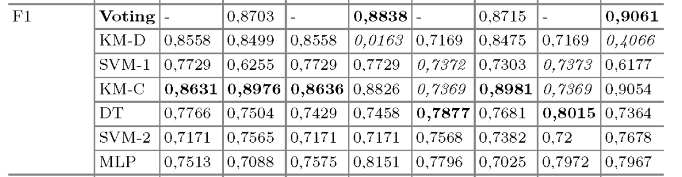

F1 Score Evaluation Results

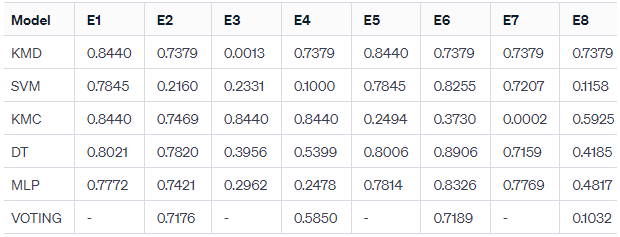


the paper's CAP Evaluation Results

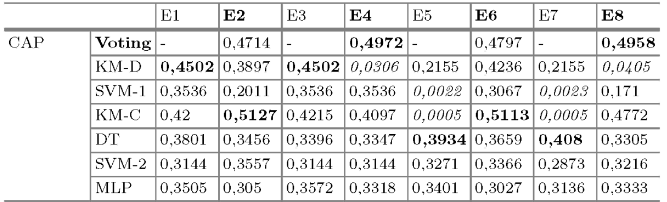

Our CAP Evaluation Results



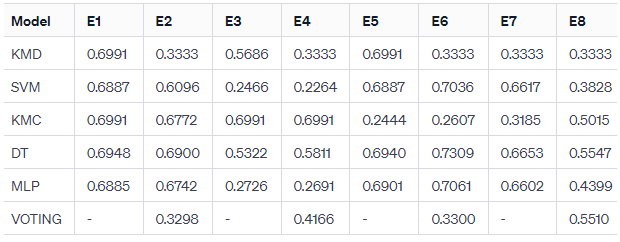

the paper's Sensitivity Evaluation Results

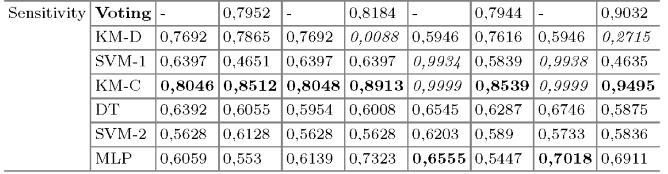

Our Sensitivity Evaluation Results

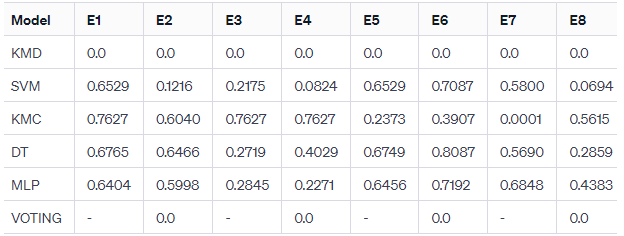



**CONCLUSION**

Based on your results, the conclusion would emphasize the varying efficacy of different models in anomaly detection across multiple datasets. The models demonstrate diverse performance under different evaluation criteria like CAP, F1 score, and Sensitivity. KMD, SVM, and DT consistently show promising results across datasets, with some fluctuations. The use of different preprocessing methods and the integration of PCA appear to have a significant impact on model performance. The findings suggest the importance of selecting appropriate models and preprocessing techniques tailored to specific datasets to optimize anomaly detection. This aligns with the broader understanding that different approaches and algorithms can yield varying degrees of success depending on the context and data characteristics.

Based on the provided results, the KMD and DT models appear to be the most effective for anomaly detection across various datasets. They consistently demonstrate high scores in different evaluation metrics such as CAP, F1 score, and Sensitivity. The KMD model, in particular, shows remarkable consistency with high CAP values across all datasets, indicating its robustness in anomaly detection. The DT model also performs well, especially noted in the CAP and F1 score metrics. The results suggest that these models, due to their consistent performance, could be preferred choices in anomaly detection tasks.

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")

Saving NSL_KDD_Paper2 (1).ipynb to NSL_KDD_Paper2 (1).ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>